In [1]:
##function for printing the intermediate noiselevels to jupyter
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import math
import logging
import time
import os
import sys
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from matplotlib import pyplot as plt
import wandb
from dataset.extract_graph import get_dataloader, get_dataloader_adj
from dataset.extract_graph import vector_to_graph, vector_to_upper_triangular, upper_triangular_to_vector, graph_from_adjacency_matrix, visualize_graph, visualize_graph_from_vector, visualize_batch_from_dataloader
from model.model2 import Powerful
from utils.graphs import discretenoise, loss_func_bce, upper_flatten_to_adj_matrix, adj_matrix_to_upper_flatten, discretenoise_adj, draw_maze_from_matrix
def plot_inter_graphs_jup(graphs,title,nr_to_analyze=0):
    maxnodes=0
    graphs_proces=[]
    for g in graphs:
        graphs_proces.append(nx.from_numpy_matrix(g[0]))

    torch.set_printoptions(profile="full")
    figure = plt.figure(figsize=(25, 25))
    max_num=len(graphs)
    img_c = int(np.sqrt(max_num))
    pos=nx.spring_layout(graphs_proces[-1])
    for i, sigmalevel_adjs in enumerate(graphs_proces):
        plt.figure(figsize=(25, 25))
        G = sigmalevel_adjs.copy()
        G.remove_nodes_from(list(nx.isolates(G)))
        e = G.number_of_edges()
        v = G.number_of_nodes()
        l = nx.number_of_selfloops(G)
        ax = plt.subplot(img_c+1, img_c+1, i+1)
        title_str = f'fl={"nrofnodes"},no={i}'
        nx.draw(G, pos, with_labels=False, **options)
        ax.title.set_text(title_str)
        plt.show()
        
    title=f'{title}-{nr_to_analyze}.pdf'
    figure.suptitle(title)

options = {
    'node_size': 2,
    'edge_color': 'black',
    'linewidths': 1,
    'width': 0.5
}

Loaded 1 train graphs.
Models loaded: Powerful(
  (activation): LeakyReLU(negative_slope=0.01)
  (time_mlp): Sequential(
    (0): Linear(in_features=1, out_features=4, bias=True)
    (1): GELU(approximate='none')
    (2): Linear(in_features=4, out_features=1, bias=True)
  )
  (in_lin): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
  )
  (layer_cat_lin): Sequential(
    (0): Linear(in_features=386, out_features=64, bias=True)
  )
  (convs): ModuleList(
    (0-5): 6 x PowerfulLayer(
      (m1): Sequential(
        (0): Linear(in_features=64, out_features=64, bias=True)
        (1): LeakyReLU(negative_slope=0.01)
        (2): Linear(in_features=64, out_features=64, bias=True)
      )
      (m2): Sequential(
        (0): Linear(in_features=64, out_features=64, bias=True)
        (1): LeakyReLU(negative_slope=0.01)
        (2): Linear(in_features=64, out_features=64, bias=True)
      )
      (m4): Sequential(
        (0): Linear(in_features=128, out_features=64, bia

/var/folders/by/3vjcwfjx72q2mrxjrnjhmp9m0000gn/T/ipykernel_39202/2155497862.py:77: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('trained_mo

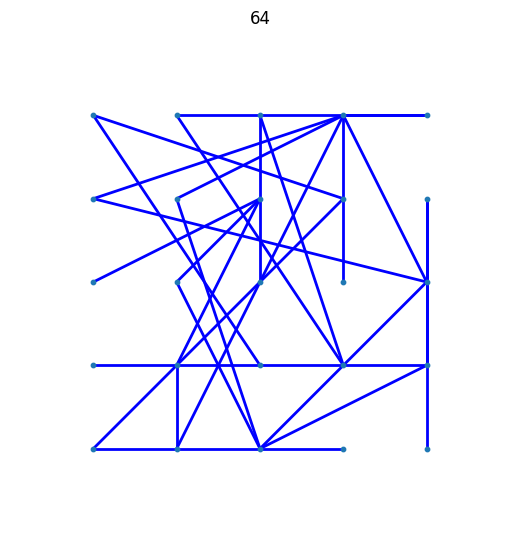

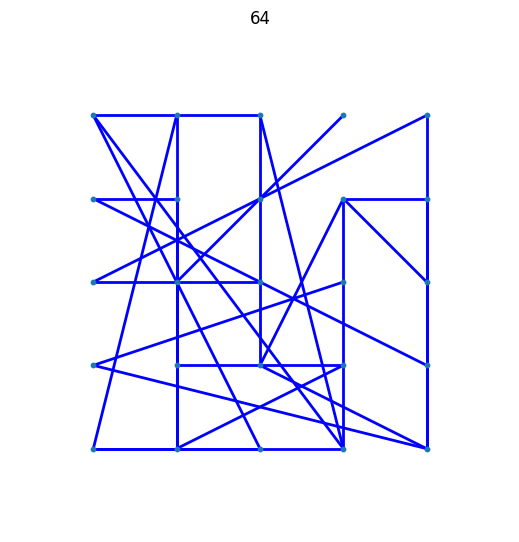

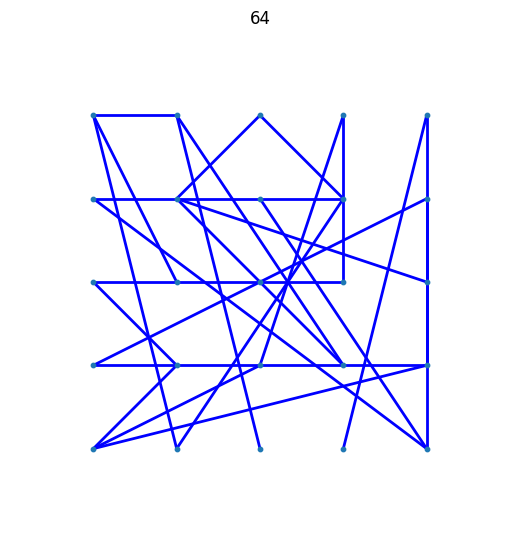

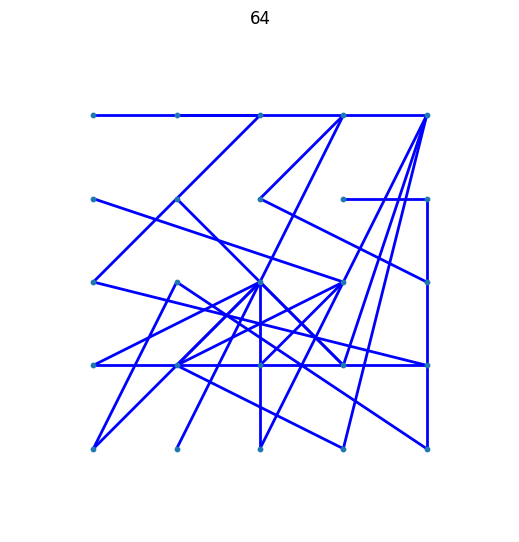

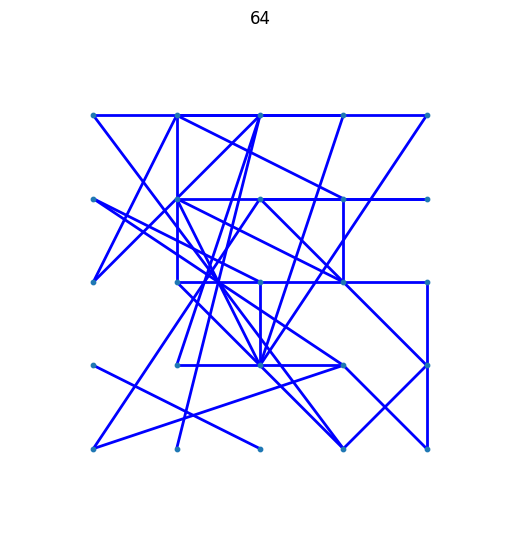

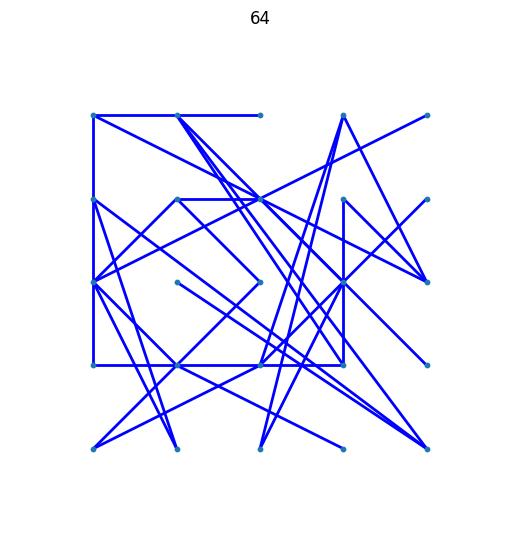

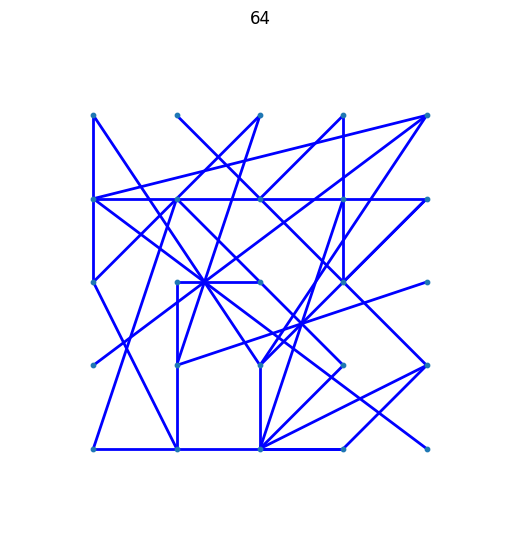

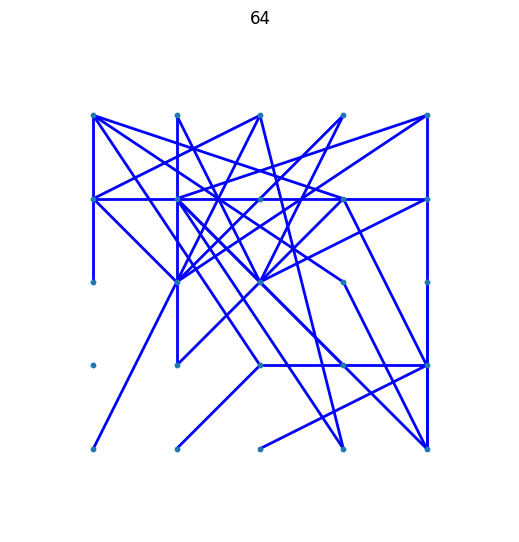

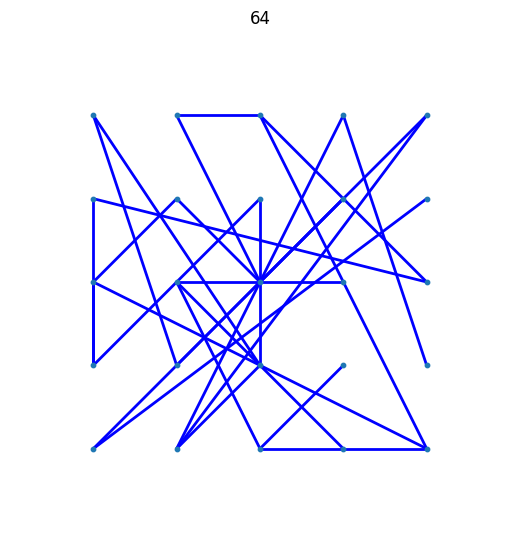

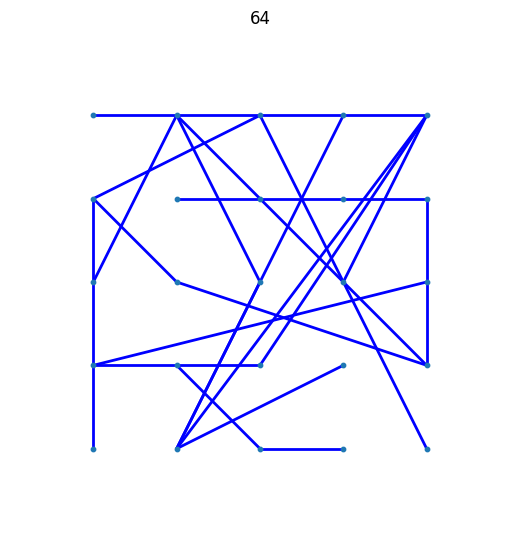

<Figure size 2500x2500 with 0 Axes>

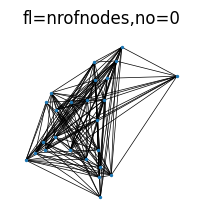

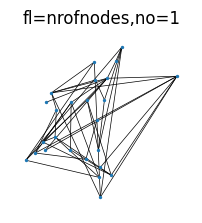

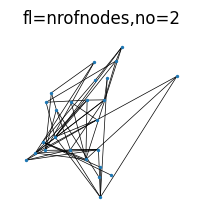

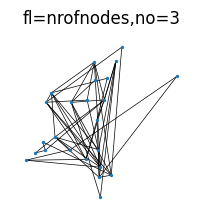

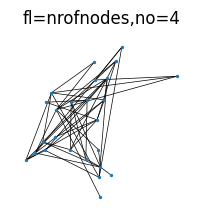

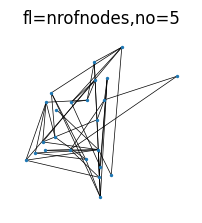

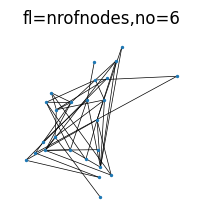

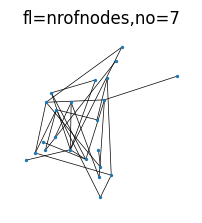

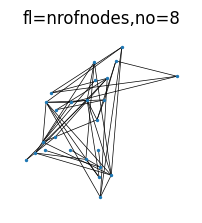

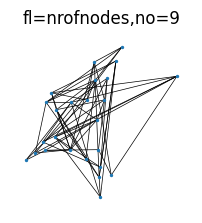

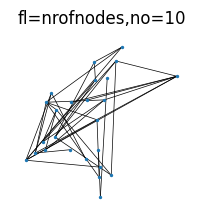

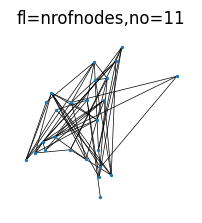

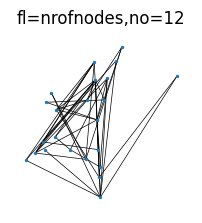

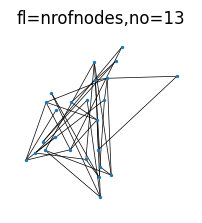

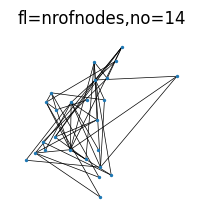

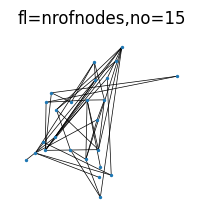

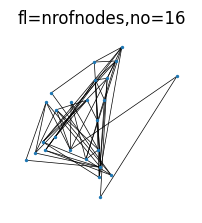

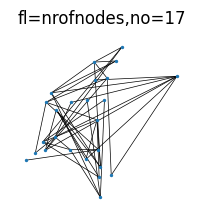

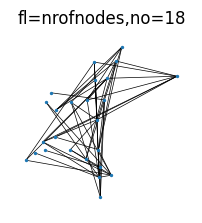

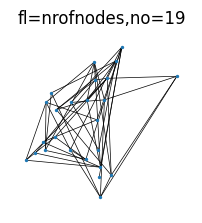

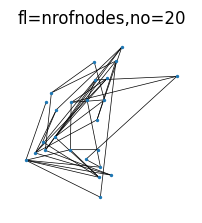

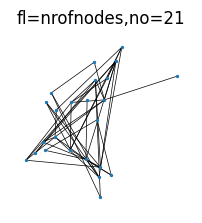

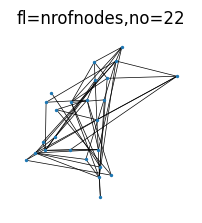

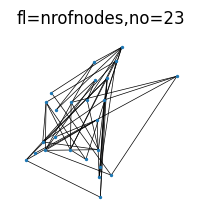

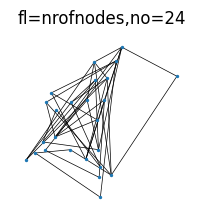

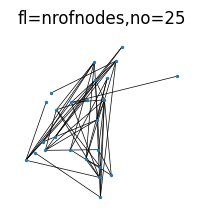

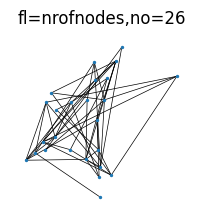

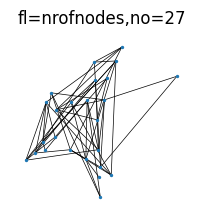

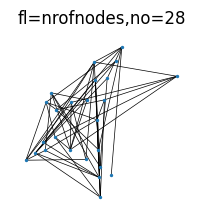

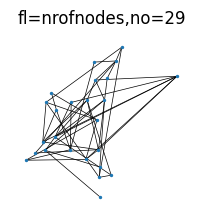

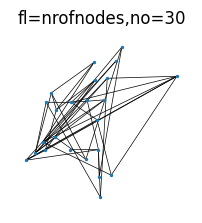

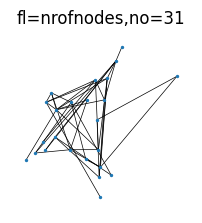

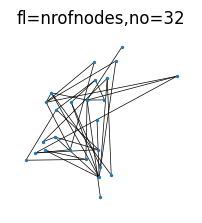

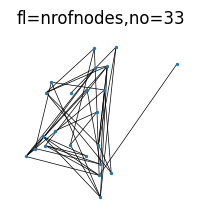

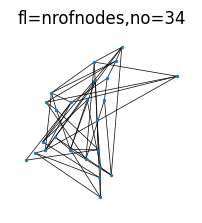

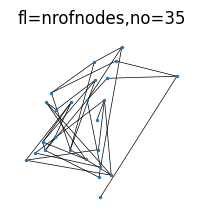

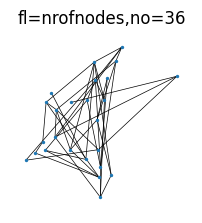

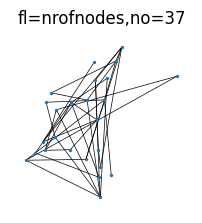

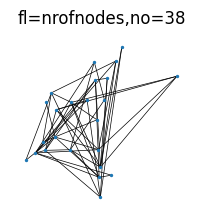

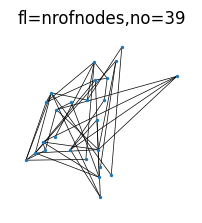

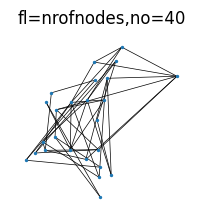

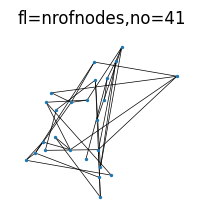

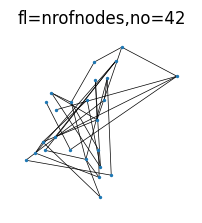

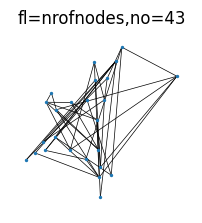

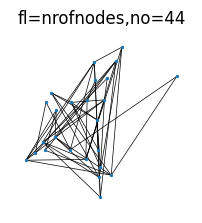

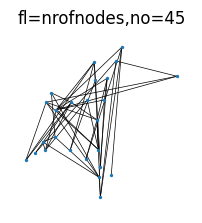

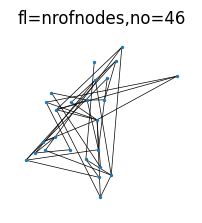

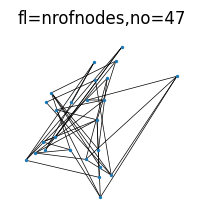

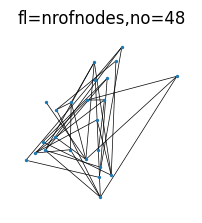

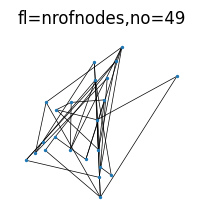

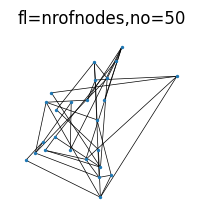

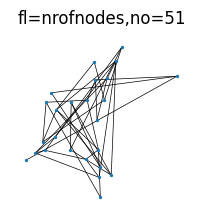

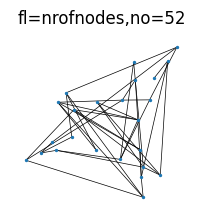

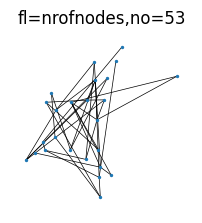

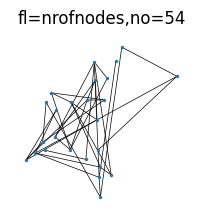

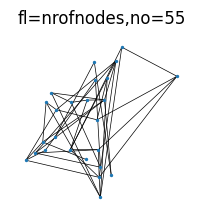

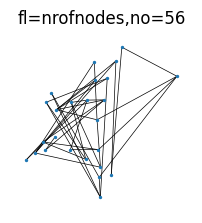

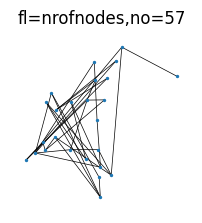

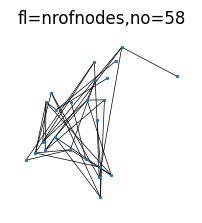

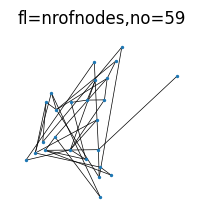

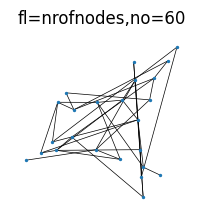

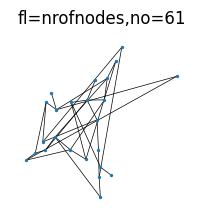

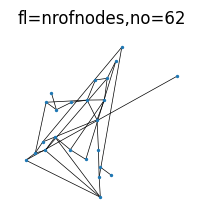

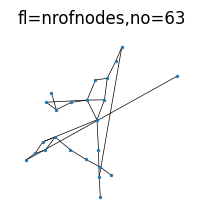

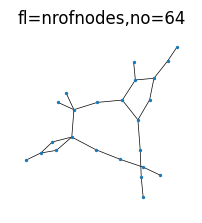

<Figure size 2500x2500 with 0 Axes>

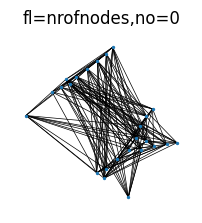

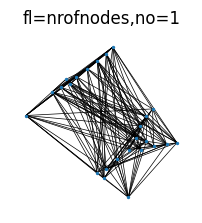

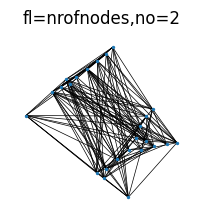

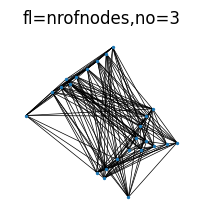

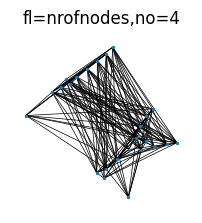

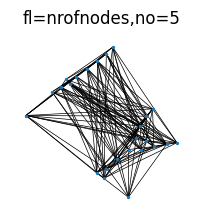

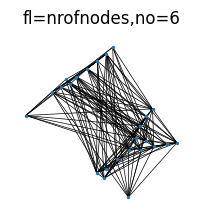

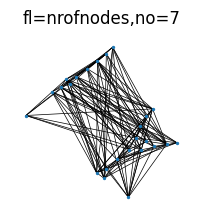

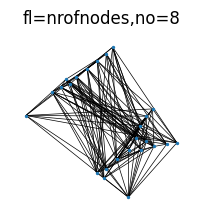

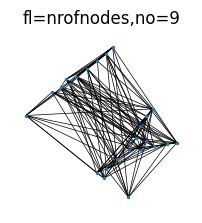

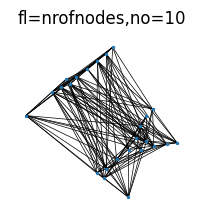

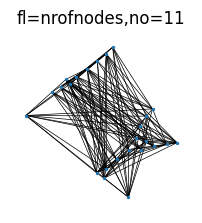

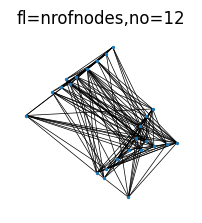

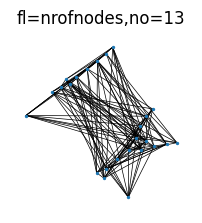

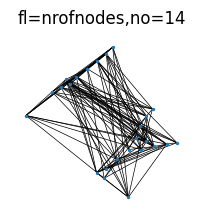

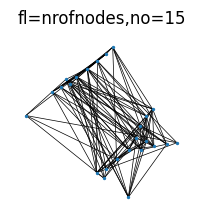

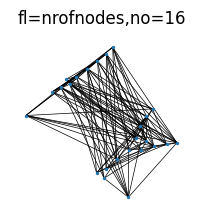

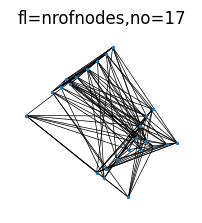

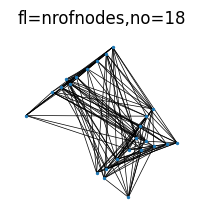

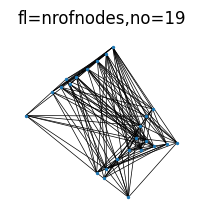

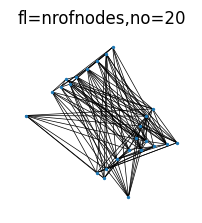

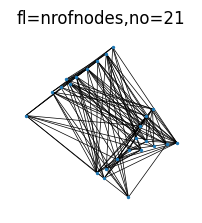

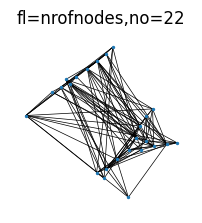

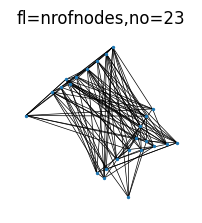

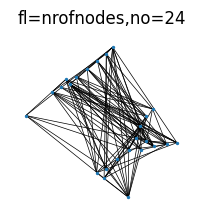

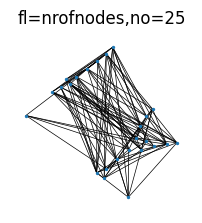

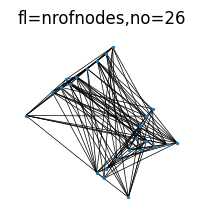

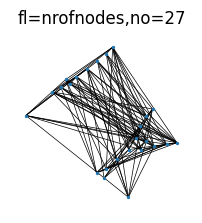

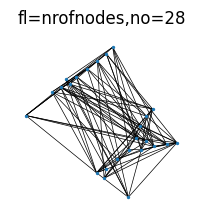

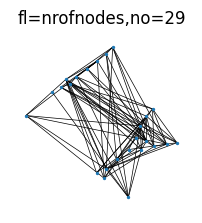

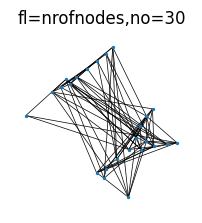

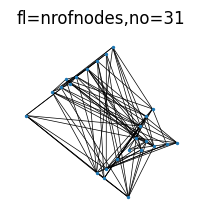

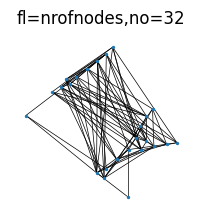

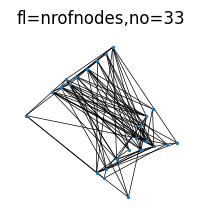

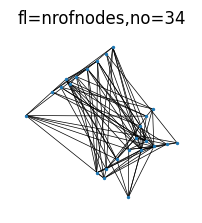

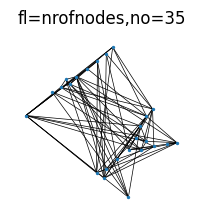

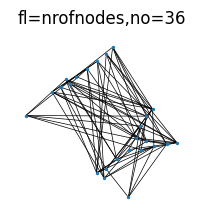

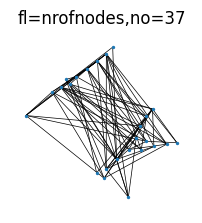

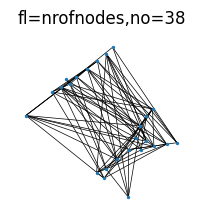

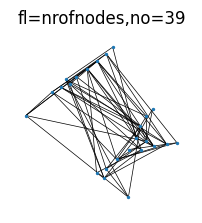

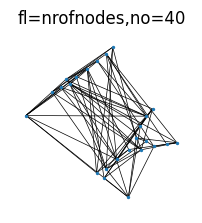

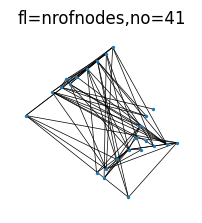

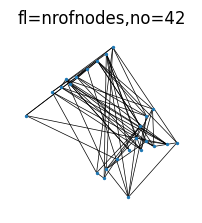

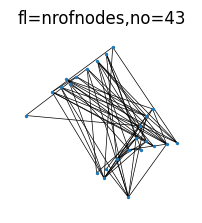

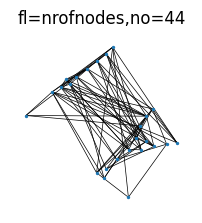

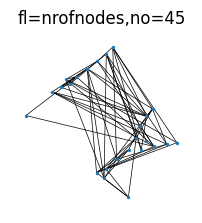

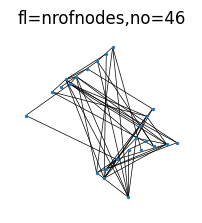

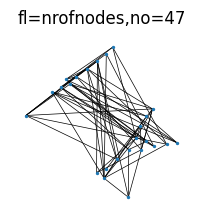

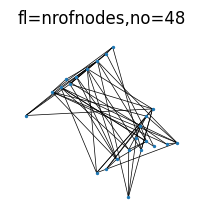

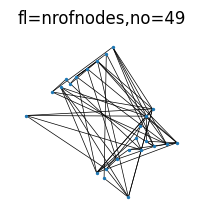

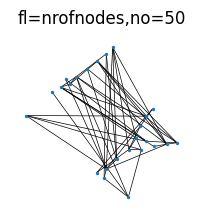

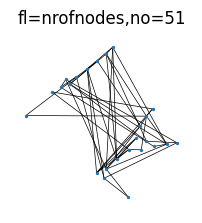

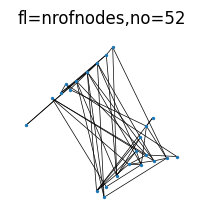

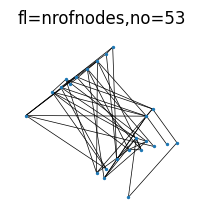

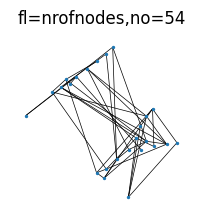

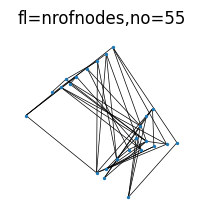

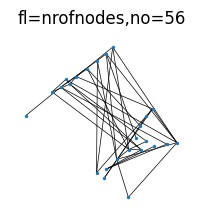

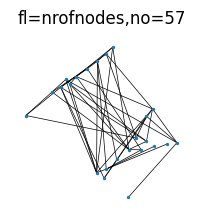

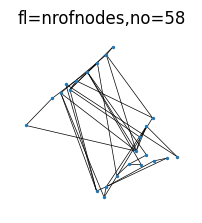

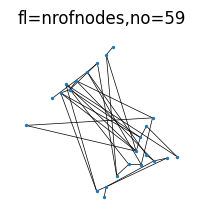

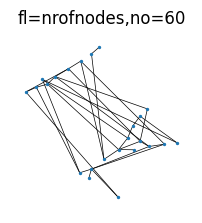

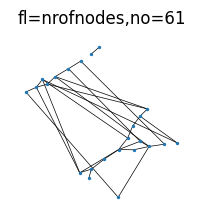

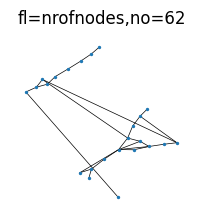

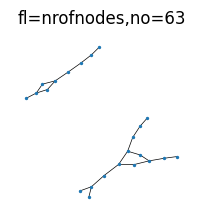

In [13]:

##function for printing the intermediate noiselevels to jupyter

def plot_inter_graphs_jup(graphs,title,nr_to_analyze=0):
    maxnodes=0
    graphs_proces=[]
    for g in graphs:
        graphs_proces.append(nx.from_numpy_matrix(g[0]))

    torch.set_printoptions(profile="full")
    figure = plt.figure(figsize=(25, 25))
    max_num=len(graphs)
    img_c = int(np.sqrt(max_num))
    pos=nx.spring_layout(graphs_proces[-1])
    for i, sigmalevel_adjs in enumerate(graphs_proces):
        plt.figure(figsize=(25, 25))
        G = sigmalevel_adjs.copy()
        G.remove_nodes_from(list(nx.isolates(G)))
        e = G.number_of_edges()
        v = G.number_of_nodes()
        l = nx.number_of_selfloops(G)
        ax = plt.subplot(img_c+1, img_c+1, i+1)
        title_str = f'fl={"nrofnodes"},no={i}'
        nx.draw(G, pos, with_labels=False, **options)
        ax.title.set_text(title_str)
        plt.show()
        
    title=f'{title}-{nr_to_analyze}.pdf'
    figure.suptitle(title)

options = {
    'node_size': 2,
    'edge_color': 'black',
    'linewidths': 1,
    'width': 0.5
}
filename = 'dataset/usts.pkl'
width, height = 5, 5
batch_size = 1  
dataloader = get_dataloader_adj(filename, width, height, batch_size)
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
def visualize_graph2(G, title="Uniform Spanning Tree"):
    plt.figure(figsize=(8, 8))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)
    plt.title(title)
    plt.show()
def sample_ppgn_simple(noise_num):
    
    batch = next(iter(dataloader))
    train_graph_list = batch
    print(f"Loaded {len(train_graph_list)} train graphs.")
    
    model = Powerful(
        use_norm_layers=False,
        name='ppgn',
        channel_num_list=[],
        feature_nums=[],
        gnn_hidden_num_list=[],
        num_layers=6,
        input_features=2,
        hidden=64,
        hidden_final=64,
        dropout_p=0.000001,
        simplified=False,
        n_nodes=25,
        device=device,
        normalization="instance",
        cat_output=True,
        adj_out=True,
        output_features=1,
        residual=False,
        project_first=False,
        node_out=False,
        noise_mlp=False
    ).to(device)

    model.load_state_dict(torch.load('trained_model_adj.pth'))
    model.eval()

    print(f"Models loaded: {model}")
    
    max_node_number = 25
    test_batch_size = 16
    test_batch_size = 1
    
    def gen_init_data(batch_size):

        base_adjs= batch.to(device)

        bernoulli_adj = torch.zeros(batch_size, max_node_number, max_node_number).to(device)
        for k, matrix in enumerate(base_adjs):
            for i, row in enumerate(matrix):
                for j, col in enumerate(row):
                    bernoulli_adj[k, i, j] = 1/2
                        
        noise_upper = torch.bernoulli(bernoulli_adj).triu(diagonal=1)
        noise_lower = noise_upper.transpose(-1, -2)
        initialmatrix = noise_lower + noise_upper
        return initialmatrix


    sigma_tens = torch.linspace(0, 1/2, noise_num)
    sigma_list = sigma_tens.tolist()
    sigma_list.sort()
    sigma_list = torch.tensor(sigma_list, dtype=torch.float32).to(device)

    def add_bernoulli( init_adjs, noiselevel):
        init_adjs, noise = discretenoise_adj(init_adjs, noiselevel, device)

        return init_adjs

    def take_step(noise_func, init_adjs, noiselevel):
        init_adjs = add_bernoulli( init_adjs, noiselevel)
        mask = torch.ones_like(init_adjs)
        noise_unnormal = noise_func(A=init_adjs.to(device), feat=None, mask=mask.to(device), noise=noiselevel)
        noise_unnormal = noise_unnormal.squeeze(-1)
        noise_rel = torch.sigmoid(noise_unnormal)
        noise_rel = (noise_rel + noise_rel.transpose(-1, -2)) / 2
        noise = torch.bernoulli(noise_rel) * mask
        
        inter_adjs = torch.where(noise > 1/2, init_adjs - 1, init_adjs)
        new_adjs = torch.where(inter_adjs < -1/2, inter_adjs + 2, inter_adjs)
        
        return init_adjs, new_adjs

    def run_sample(eval_len=10, methods=None):
        gen_graph_list = []
        with torch.no_grad():
            while len(gen_graph_list)<eval_len:
                count=0
                init_adjs= gen_init_data(batch_size = test_batch_size)

                ##
                mult_stages_noise = []
                mult_stages = [init_adjs.detach().cpu().numpy()]
                ##

                while count<len(sigma_list):
                    noiselevel=sigma_list[len(sigma_list)-count-1]
                    noisy_adjs,init_adjs=take_step(lambda feat, A, mask, noise: model(feat, A, mask, noise), init_adjs=init_adjs, noiselevel=noiselevel)
                    count=count+1
                    mult_stages_noise.append(noisy_adjs.detach().cpu().numpy())
                    mult_stages.append(init_adjs.detach().cpu().numpy())
                draw_maze_from_matrix(init_adjs.detach().cpu().numpy()[0], width, height, f'{count}')
                gen_graph_list.append(init_adjs.cpu().numpy())

        pic_title = f'final_sample_ipynb_{noise_num}.pdf'
        #plot_graphs_list(graphs=gen_graph_list, title=pic_title, save_dir=config.save_dir)
        plot_inter_graphs_jup(graphs=mult_stages, title='intermediate', nr_to_analyze=0)
        plot_inter_graphs_jup(graphs=mult_stages_noise, title='intermediate', nr_to_analyze=0)
    result_dict = run_sample()

    return result_dict


sample_ppgn_simple(64)

Loaded 1 train graphs.
Models loaded: Powerful(
  (activation): LeakyReLU(negative_slope=0.01)
  (time_mlp): Sequential(
    (0): Linear(in_features=1, out_features=4, bias=True)
    (1): GELU(approximate='none')
    (2): Linear(in_features=4, out_features=1, bias=True)
  )
  (in_lin): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
  )
  (layer_cat_lin): Sequential(
    (0): Linear(in_features=386, out_features=64, bias=True)
  )
  (convs): ModuleList(
    (0-5): 6 x PowerfulLayer(
      (m1): Sequential(
        (0): Linear(in_features=64, out_features=64, bias=True)
        (1): LeakyReLU(negative_slope=0.01)
        (2): Linear(in_features=64, out_features=64, bias=True)
      )
      (m2): Sequential(
        (0): Linear(in_features=64, out_features=64, bias=True)
        (1): LeakyReLU(negative_slope=0.01)
        (2): Linear(in_features=64, out_features=64, bias=True)
      )
      (m4): Sequential(
        (0): Linear(in_features=128, out_features=64, bia

/var/folders/by/3vjcwfjx72q2mrxjrnjhmp9m0000gn/T/ipykernel_42056/4088610403.py:97: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('trained_mo

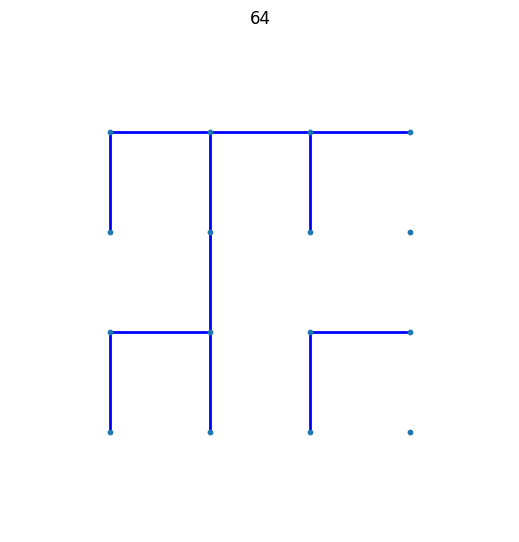

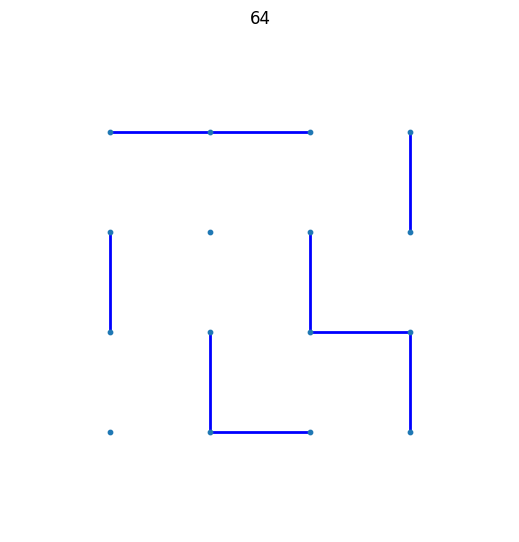

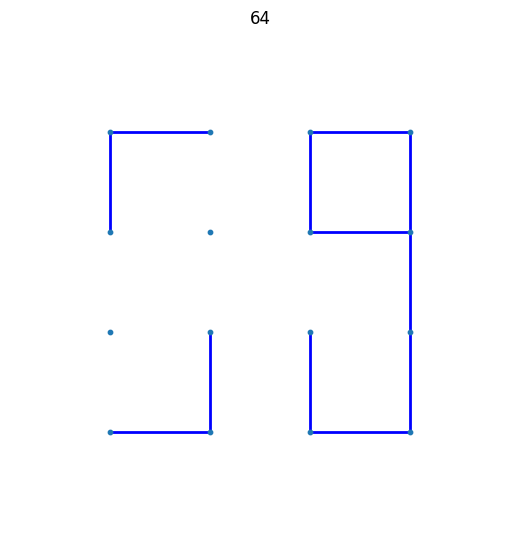

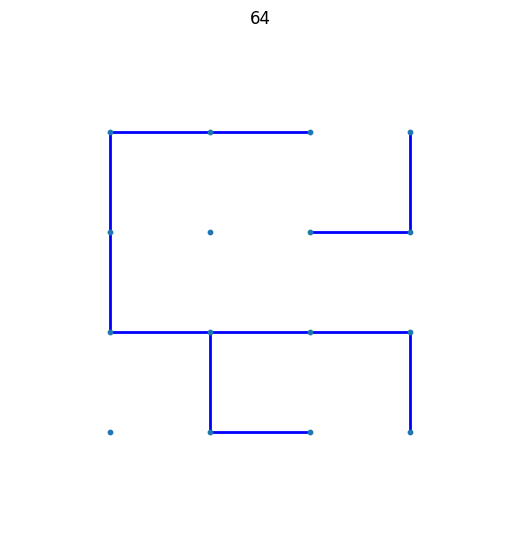

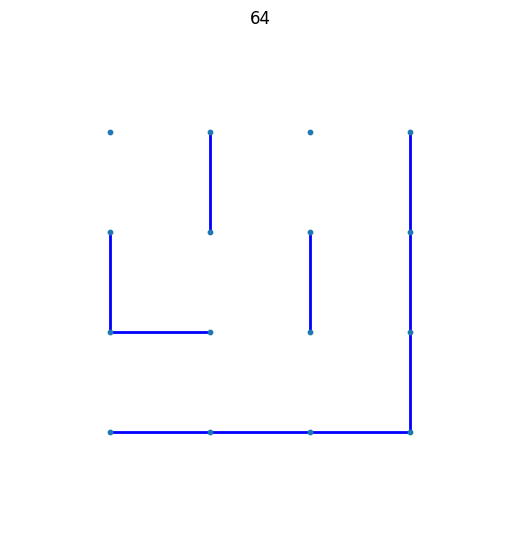

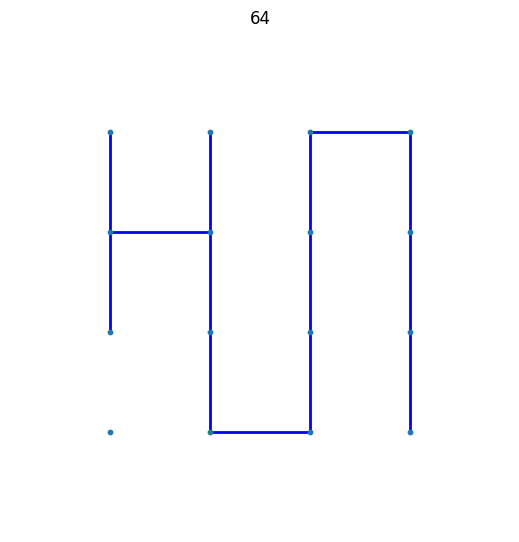

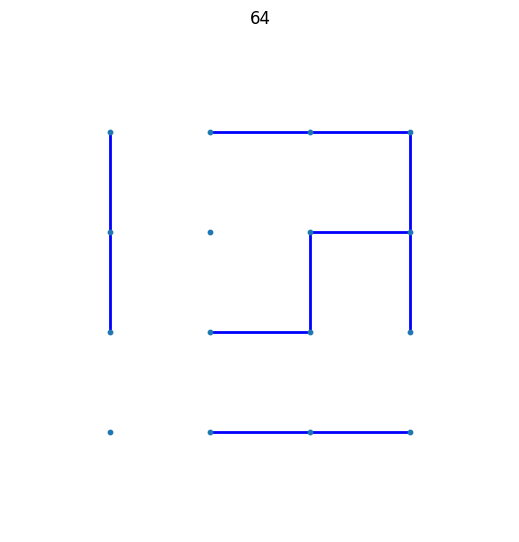

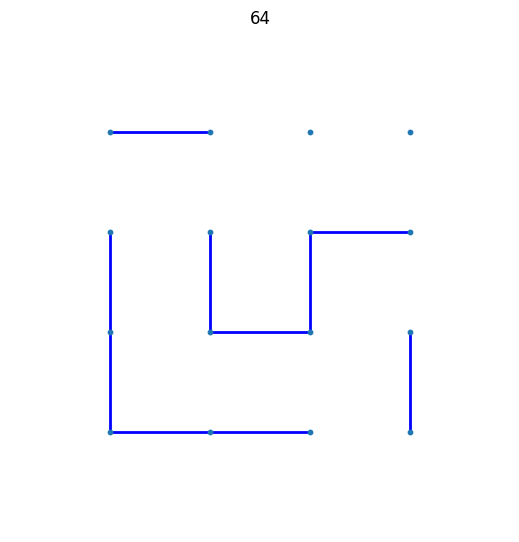

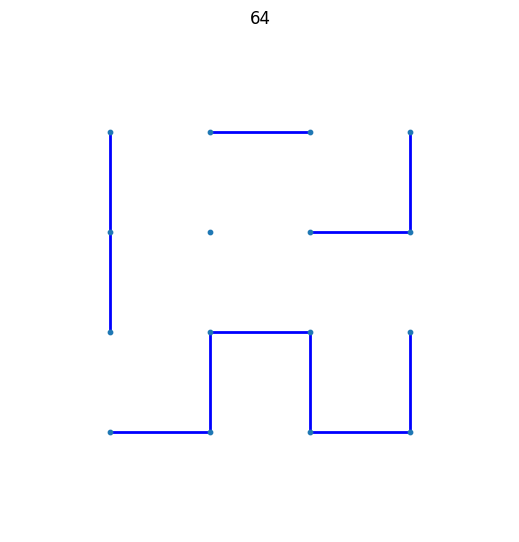

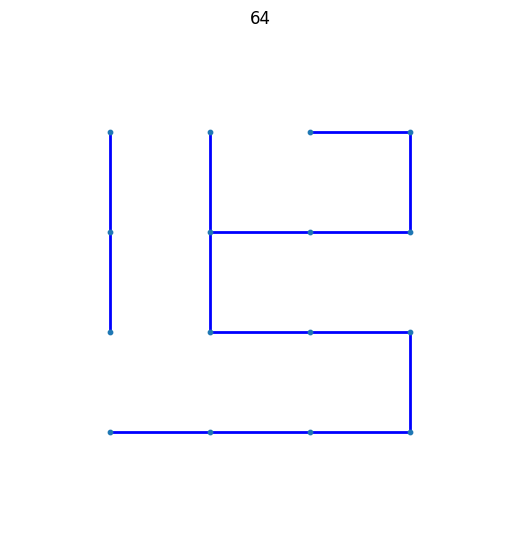

<Figure size 2500x2500 with 0 Axes>

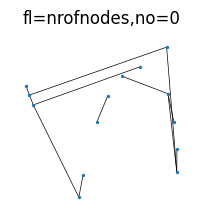

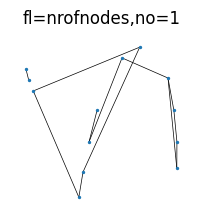

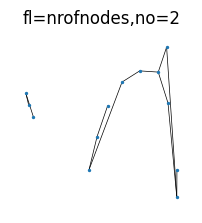

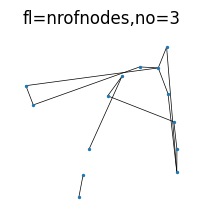

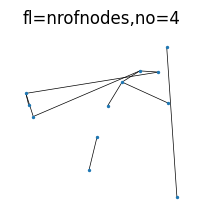

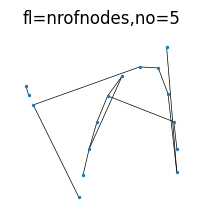

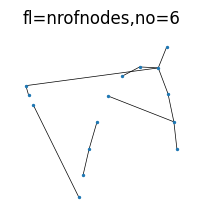

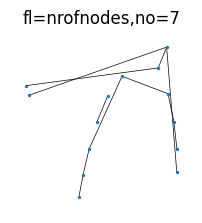

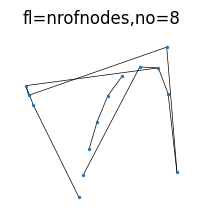

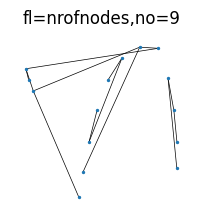

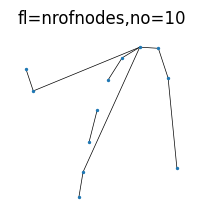

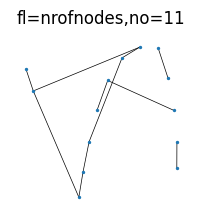

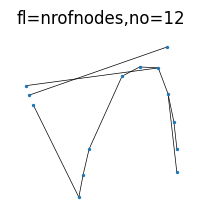

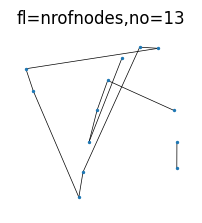

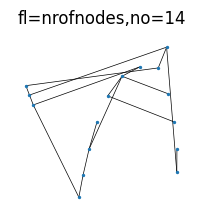

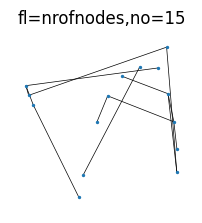

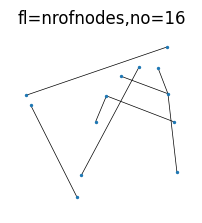

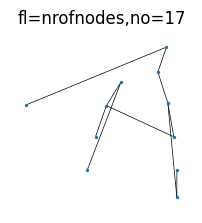

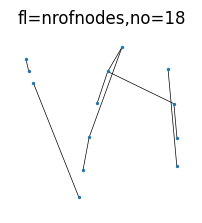

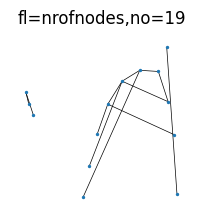

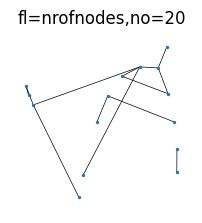

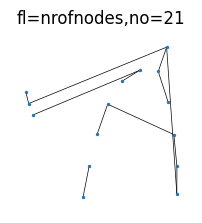

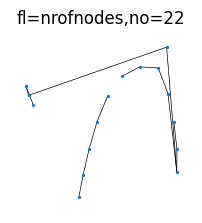

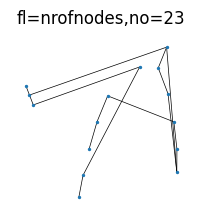

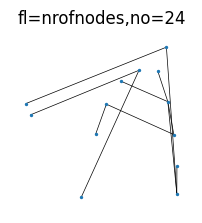

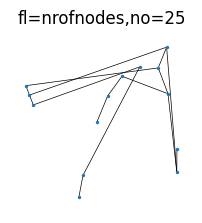

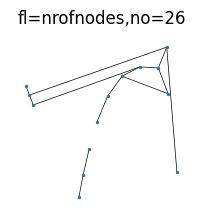

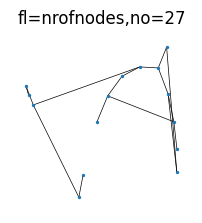

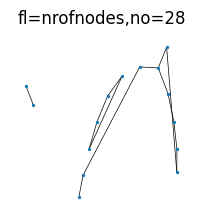

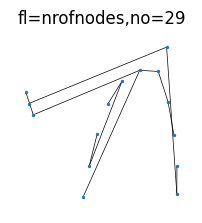

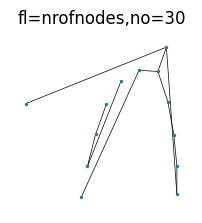

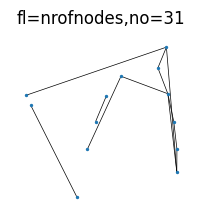

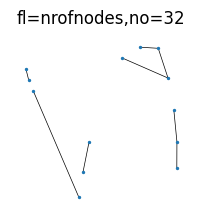

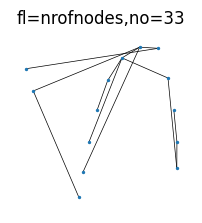

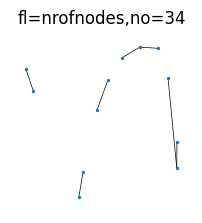

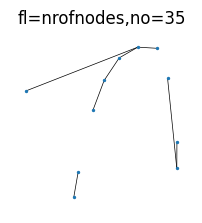

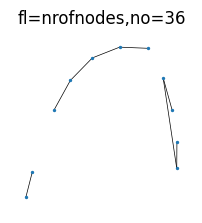

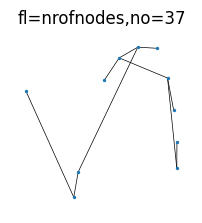

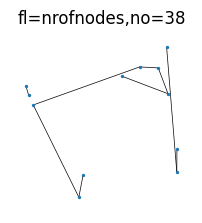

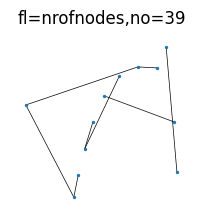

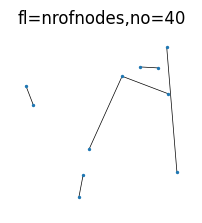

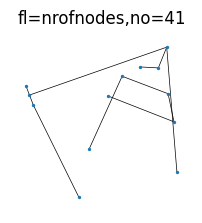

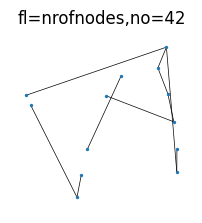

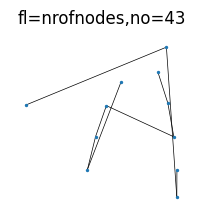

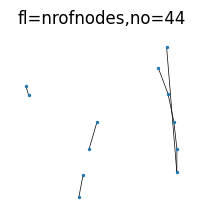

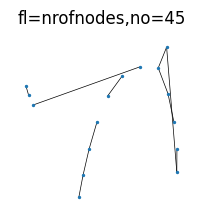

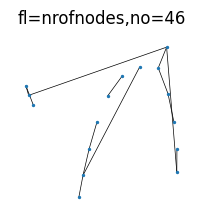

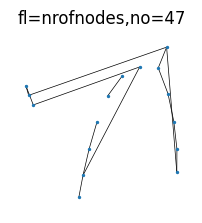

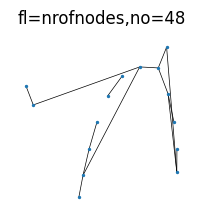

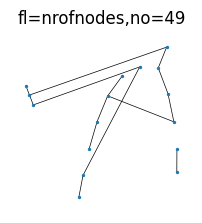

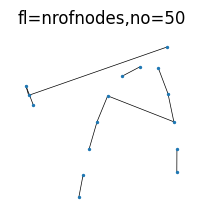

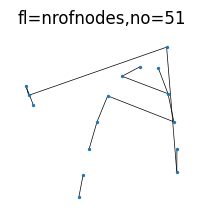

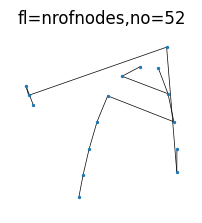

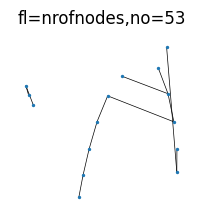

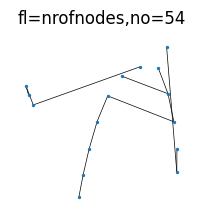

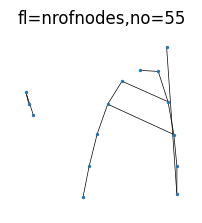

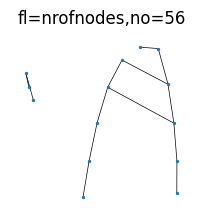

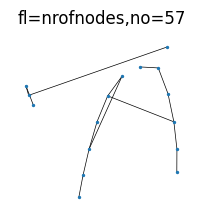

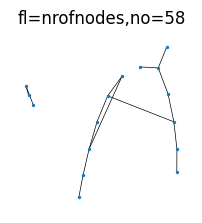

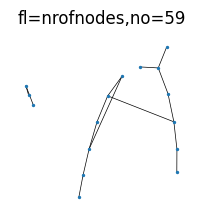

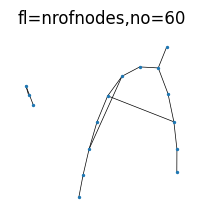

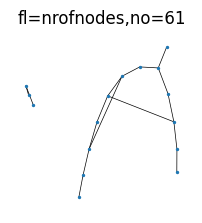

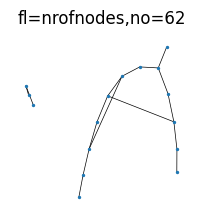

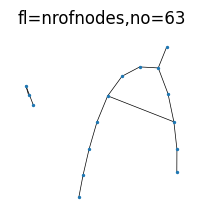

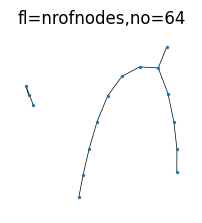

<Figure size 2500x2500 with 0 Axes>

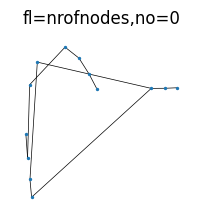

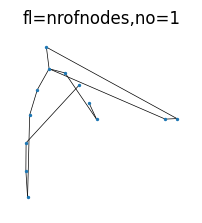

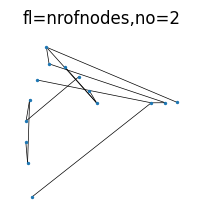

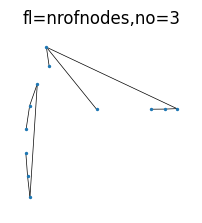

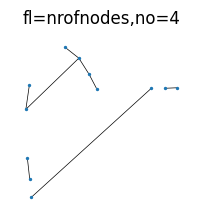

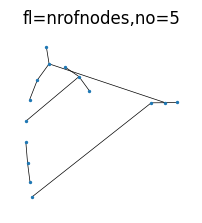

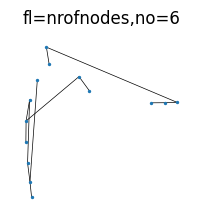

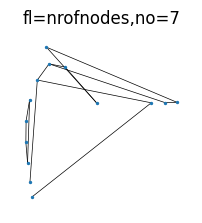

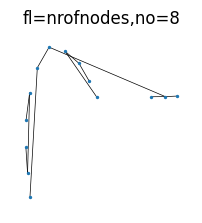

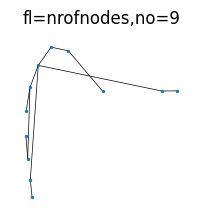

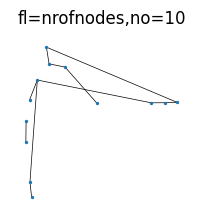

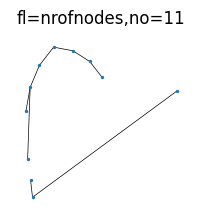

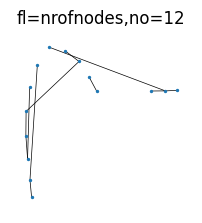

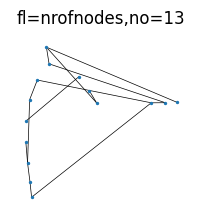

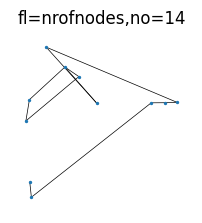

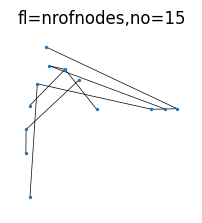

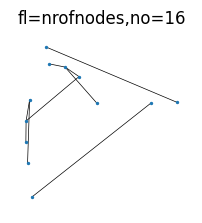

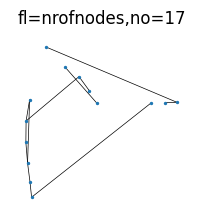

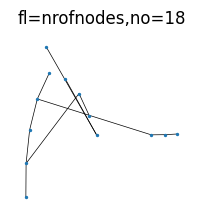

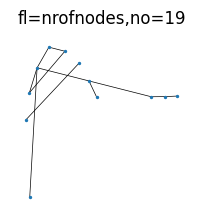

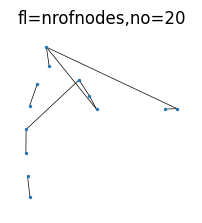

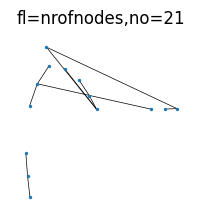

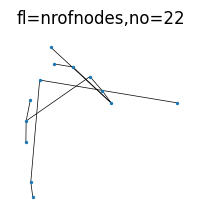

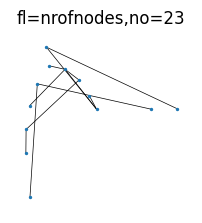

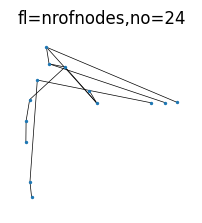

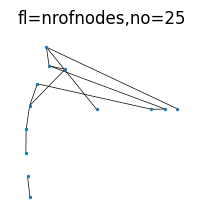

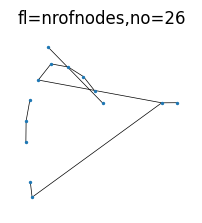

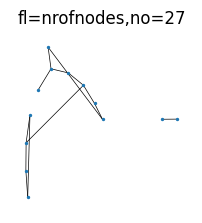

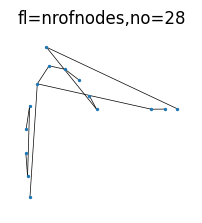

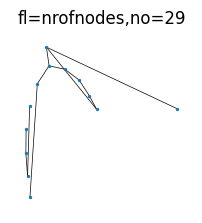

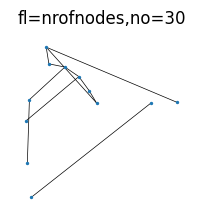

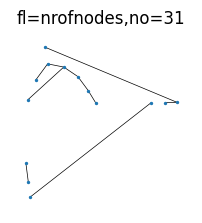

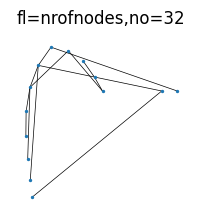

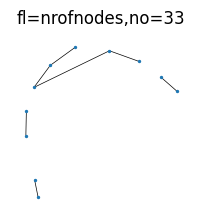

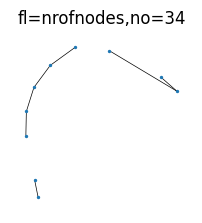

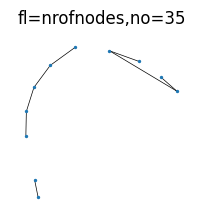

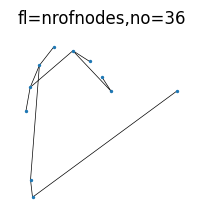

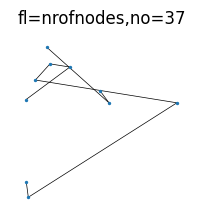

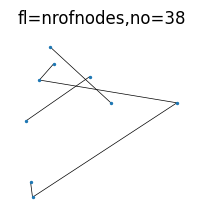

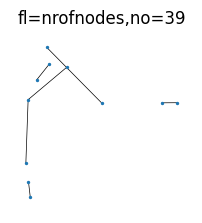

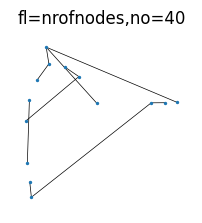

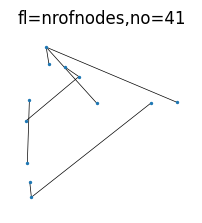

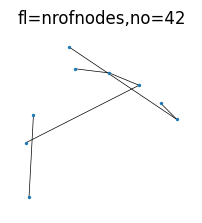

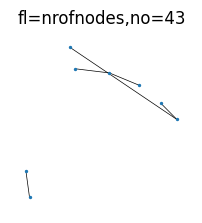

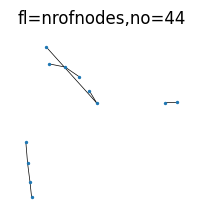

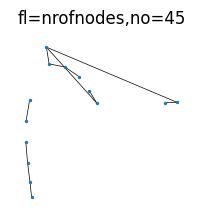

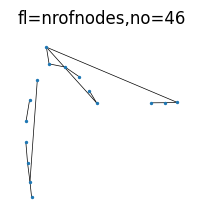

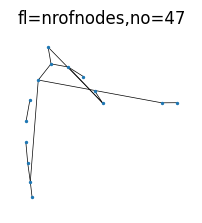

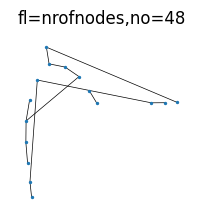

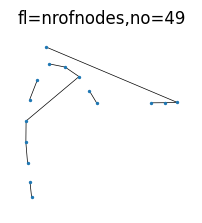

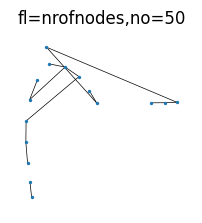

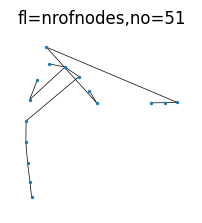

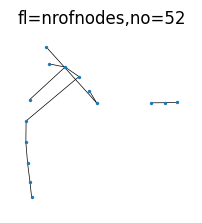

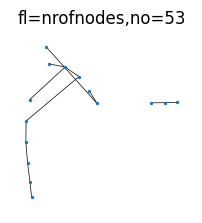

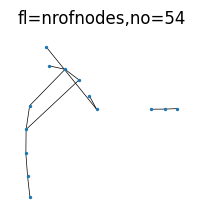

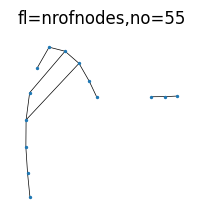

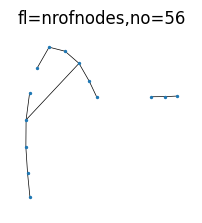

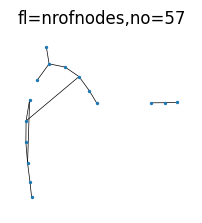

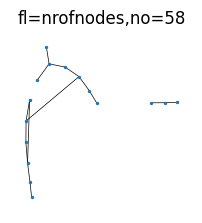

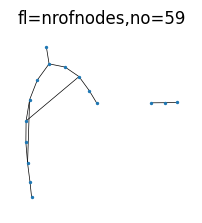

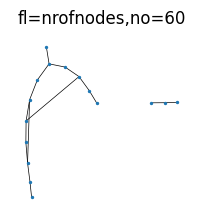

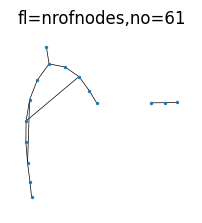

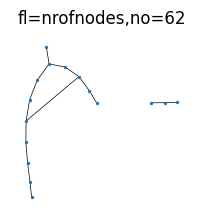

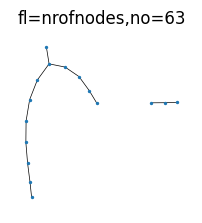

In [4]:
from utils.graphs import discretenoise_adj_neigh, create_adjacency_mask
##function for printing the intermediate noiselevels to jupyter
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import math
import logging
import time
import os
import sys
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from matplotlib import pyplot as plt
import wandb
from dataset.extract_graph import get_dataloader, get_dataloader_adj
from dataset.extract_graph import vector_to_graph, vector_to_upper_triangular, upper_triangular_to_vector, graph_from_adjacency_matrix, visualize_graph, visualize_graph_from_vector, visualize_batch_from_dataloader
from model.model2 import Powerful
from utils.graphs import discretenoise, loss_func_bce, upper_flatten_to_adj_matrix, adj_matrix_to_upper_flatten, discretenoise_adj, draw_maze_from_matrix
##function for printing the intermediate noiselevels to jupyter
grid_shape = (4, 4)
def plot_inter_graphs_jup(graphs,title,nr_to_analyze=0):
    maxnodes=0
    graphs_proces=[]
    for g in graphs:
        graphs_proces.append(nx.from_numpy_matrix(g[0]))

    torch.set_printoptions(profile="full")
    figure = plt.figure(figsize=(25, 25))
    max_num=len(graphs)
    img_c = int(np.sqrt(max_num))
    pos=nx.spring_layout(graphs_proces[-1])
    for i, sigmalevel_adjs in enumerate(graphs_proces):
        plt.figure(figsize=(25, 25))
        G = sigmalevel_adjs.copy()
        G.remove_nodes_from(list(nx.isolates(G)))
        e = G.number_of_edges()
        v = G.number_of_nodes()
        l = nx.number_of_selfloops(G)
        ax = plt.subplot(img_c+1, img_c+1, i+1)
        title_str = f'fl={"nrofnodes"},no={i}'
        nx.draw(G, pos, with_labels=False, **options)
        ax.title.set_text(title_str)
        plt.show()
        
    title=f'{title}-{nr_to_analyze}.pdf'
    figure.suptitle(title)

options = {
    'node_size': 2,
    'edge_color': 'black',
    'linewidths': 1,
    'width': 0.5
}
filename = 'dataset/usts_4.pkl'
width, height = 4, 4
batch_size = 1  
dataloader = get_dataloader_adj(filename, width, height, batch_size)
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
def visualize_graph2(G, title="Uniform Spanning Tree"):
    plt.figure(figsize=(8, 8))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)
    plt.title(title)
    plt.show()
def sample_ppgn_simple(noise_num):
    
    batch = next(iter(dataloader))
    train_graph_list = batch
    print(f"Loaded {len(train_graph_list)} train graphs.")
    
    model = Powerful(
        use_norm_layers=False,
        name='ppgn',
        channel_num_list=[],
        feature_nums=[],
        gnn_hidden_num_list=[],
        num_layers=6,
        input_features=2,
        hidden=64,
        hidden_final=64,
        dropout_p=0.000001,
        simplified=False,
        n_nodes=25,
        device=device,
        normalization="instance",
        cat_output=True,
        adj_out=True,
        output_features=1,
        residual=False,
        project_first=False,
        node_out=False,
        noise_mlp=False
    ).to(device)

    model.load_state_dict(torch.load('trained_model_adj_neigh_cycle_conn.pth'))
    model.eval()

    print(f"Models loaded: {model}")
    
    max_node_number = 16
    test_batch_size = 16
    test_batch_size = 1
    
    
    def gen_init_data(batch_size, grid_shape, device):
        size = grid_shape[0] * grid_shape[1]
        adjacency_mask = create_adjacency_mask(grid_shape)
        adjacency_mask = torch.tensor(adjacency_mask, dtype=torch.float32).to(device)
        
        bernoulli_adj = torch.zeros(batch_size, size, size).to(device)
        bernoulli_adj += adjacency_mask.unsqueeze(0) * 0.5  # Probability of 0.5 for each neighbor

        noise_upper = torch.bernoulli(bernoulli_adj).triu(diagonal=1)
        noise_lower = noise_upper.transpose(-1, -2)
        initial_matrix = noise_lower + noise_upper
        return initial_matrix


    sigma_tens = torch.linspace(0, 1/2, noise_num)
    sigma_list = sigma_tens.tolist()
    sigma_list.sort()
    sigma_list = torch.tensor(sigma_list, dtype=torch.float32).to(device)

    def add_bernoulli( init_adjs, noiselevel):
        init_adjs, noise = discretenoise_adj_neigh(init_adjs, noiselevel, device, grid_shape)

        return init_adjs

    def take_step(noise_func, init_adjs, noiselevel):
        init_adjs = add_bernoulli( init_adjs, noiselevel)
        mask = torch.ones_like(init_adjs)
        noise_unnormal = noise_func(A=init_adjs.to(device), feat=None, mask=mask.to(device), noise=noiselevel)
        noise_unnormal = noise_unnormal.squeeze(-1)
        noise_rel = torch.sigmoid(noise_unnormal)
        noise_rel = (noise_rel + noise_rel.transpose(-1, -2)) / 2
        noise = torch.bernoulli(noise_rel) * mask
        adjacency_mask = create_adjacency_mask(grid_shape)
        adjacency_mask = torch.tensor(adjacency_mask, dtype=torch.float32).to(device)
        inter_adjs = torch.where(noise > 1/2, init_adjs - 1, init_adjs)
        new_adjs = torch.where(inter_adjs < -1/2, inter_adjs + 2, inter_adjs)
        new_adjs *= adjacency_mask
        return init_adjs, new_adjs

    def run_sample(eval_len=10, methods=None):
        gen_graph_list = []
        with torch.no_grad():
            while len(gen_graph_list)<eval_len:
                count=0
                init_adjs= gen_init_data(test_batch_size,grid_shape, device)

                ##
                mult_stages_noise = []
                mult_stages = [init_adjs.detach().cpu().numpy()]
                ##

                while count<len(sigma_list):
                    noiselevel=sigma_list[len(sigma_list)-count-1]
                    noisy_adjs,init_adjs=take_step(lambda feat, A, mask, noise: model(feat, A, mask, noise), init_adjs=init_adjs, noiselevel=noiselevel)
                    count=count+1
                    mult_stages_noise.append(noisy_adjs.detach().cpu().numpy())
                    mult_stages.append(init_adjs.detach().cpu().numpy())
                draw_maze_from_matrix(init_adjs.detach().cpu().numpy()[0], width, height, f'{count}')
                gen_graph_list.append(init_adjs.cpu().numpy())

        pic_title = f'final_sample_ipynb_{noise_num}.pdf'
        #plot_graphs_list(graphs=gen_graph_list, title=pic_title, save_dir=config.save_dir)
        plot_inter_graphs_jup(graphs=mult_stages, title='intermediate', nr_to_analyze=0)
        plot_inter_graphs_jup(graphs=mult_stages_noise, title='intermediate', nr_to_analyze=0)
    result_dict = run_sample()

    return result_dict


sample_ppgn_simple(64)

Loaded 1 train graphs.
Starting run_sample...



/var/folders/by/3vjcwfjx72q2mrxjrnjhmp9m0000gn/T/ipykernel_19084/2061815374.py:41: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('trained_mo

torch.Size([1, 120])
torch.Size([120])


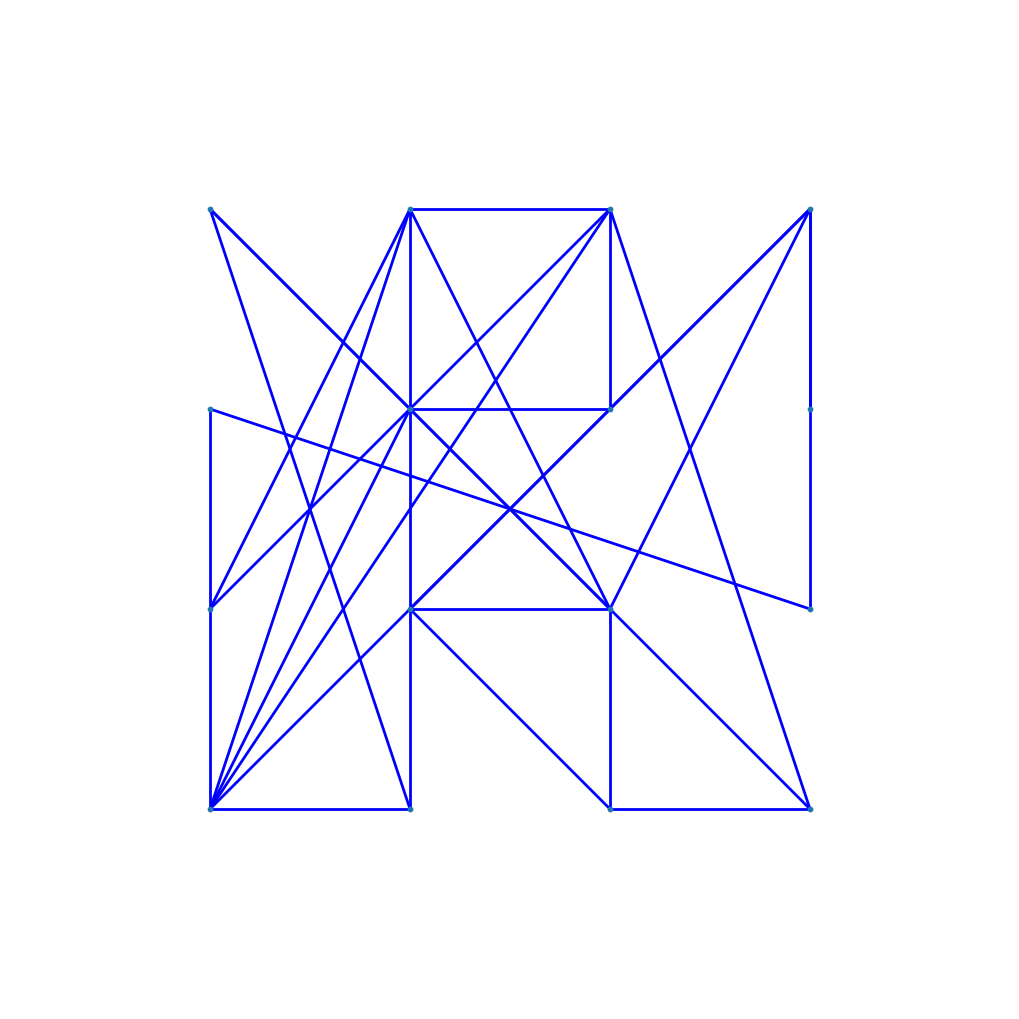

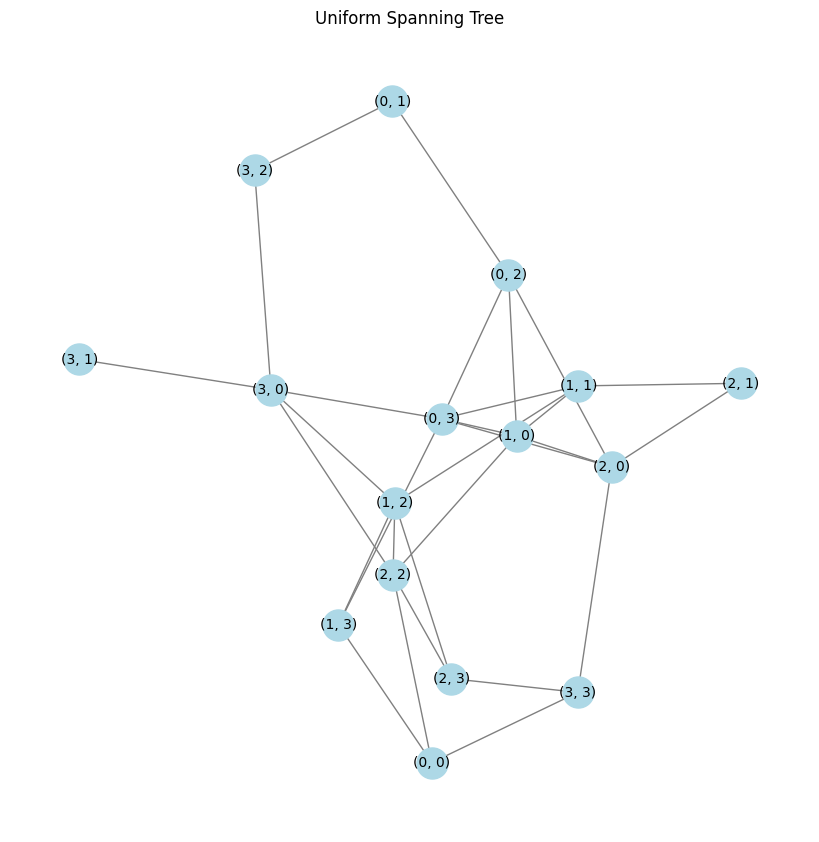

Generated graph 33.

torch.Size([1, 120])
torch.Size([120])


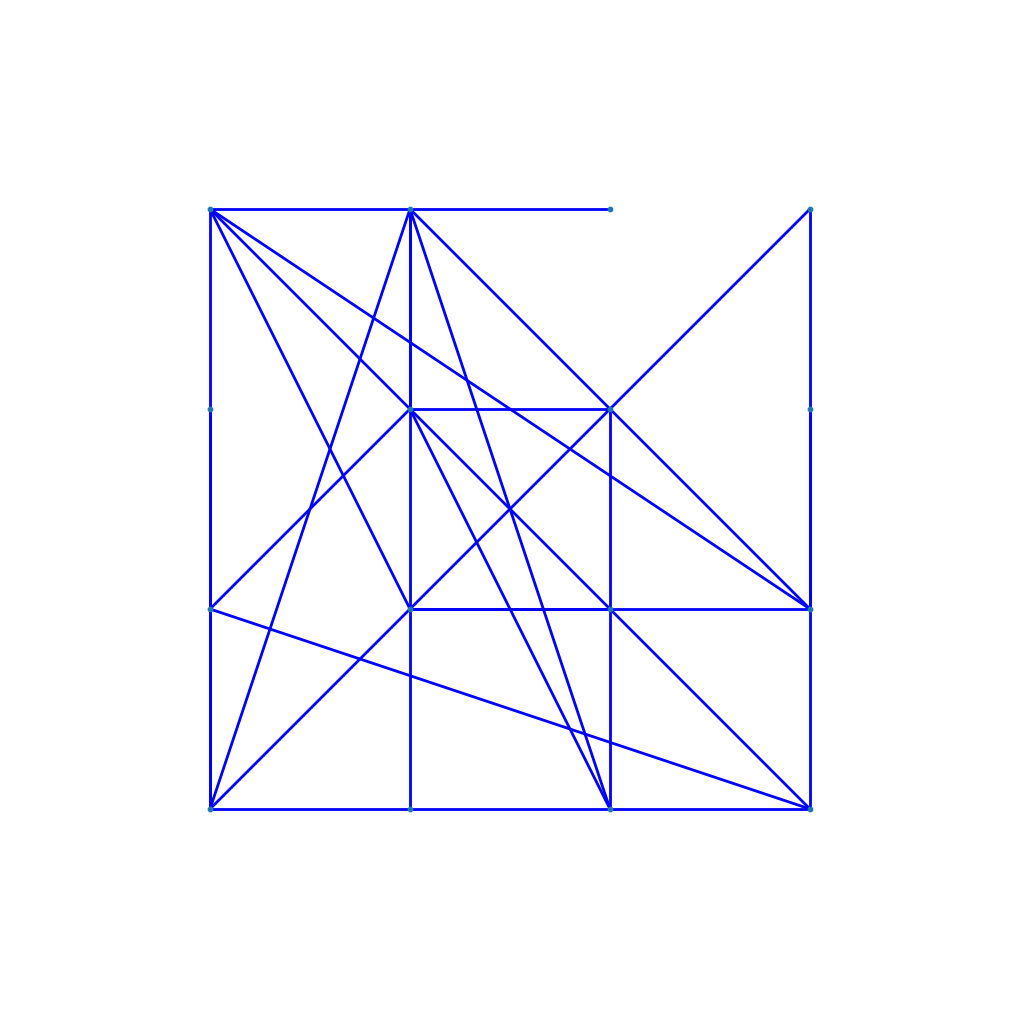

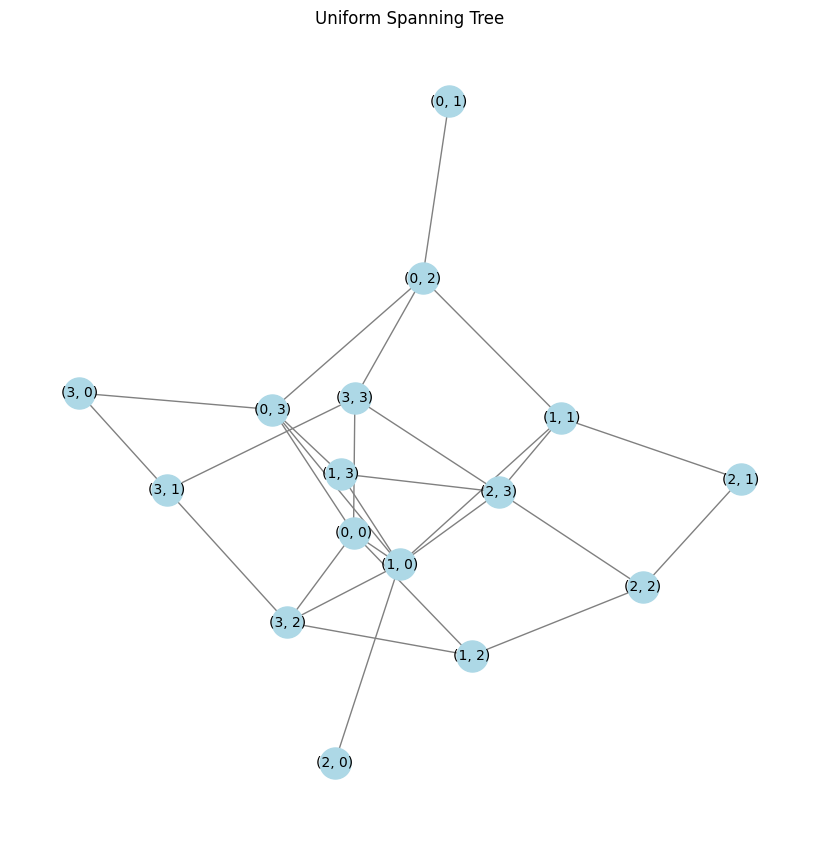

Generated graph 33.

torch.Size([1, 120])
torch.Size([120])


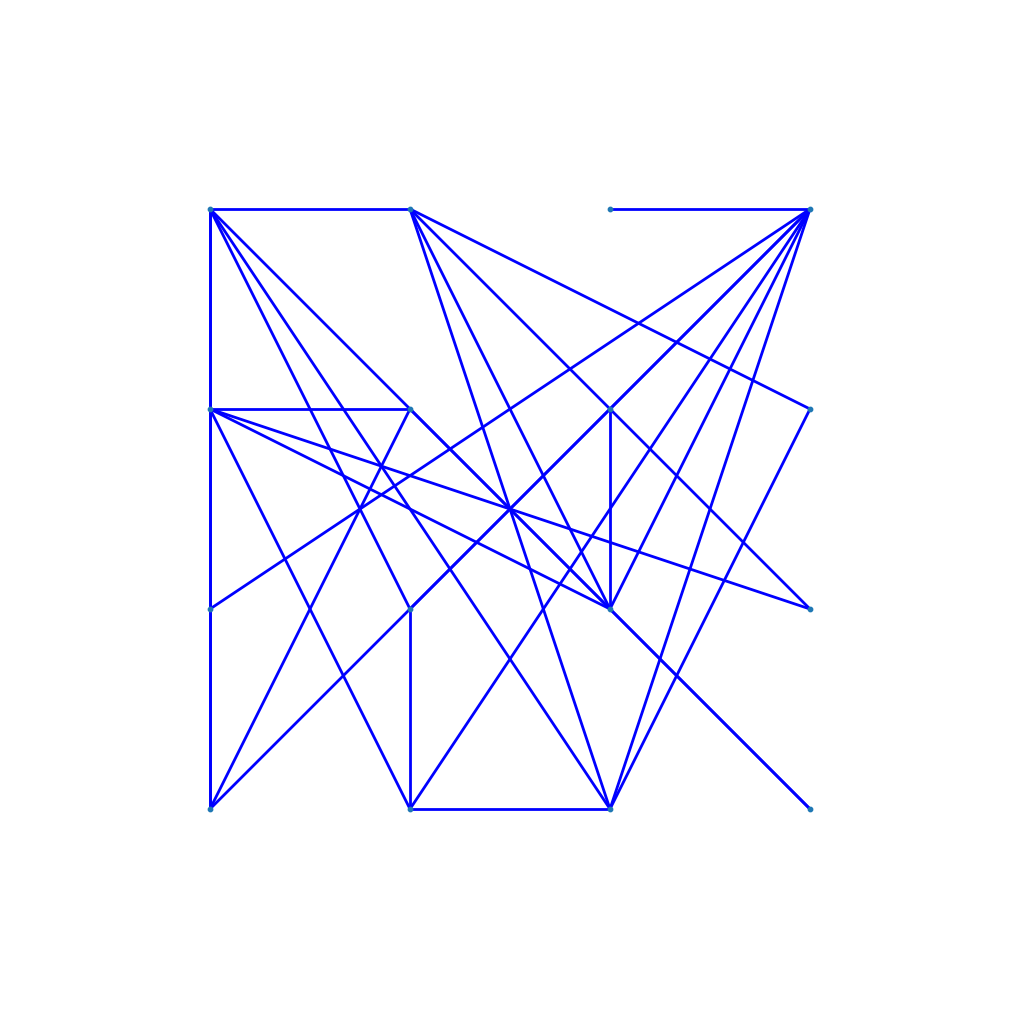

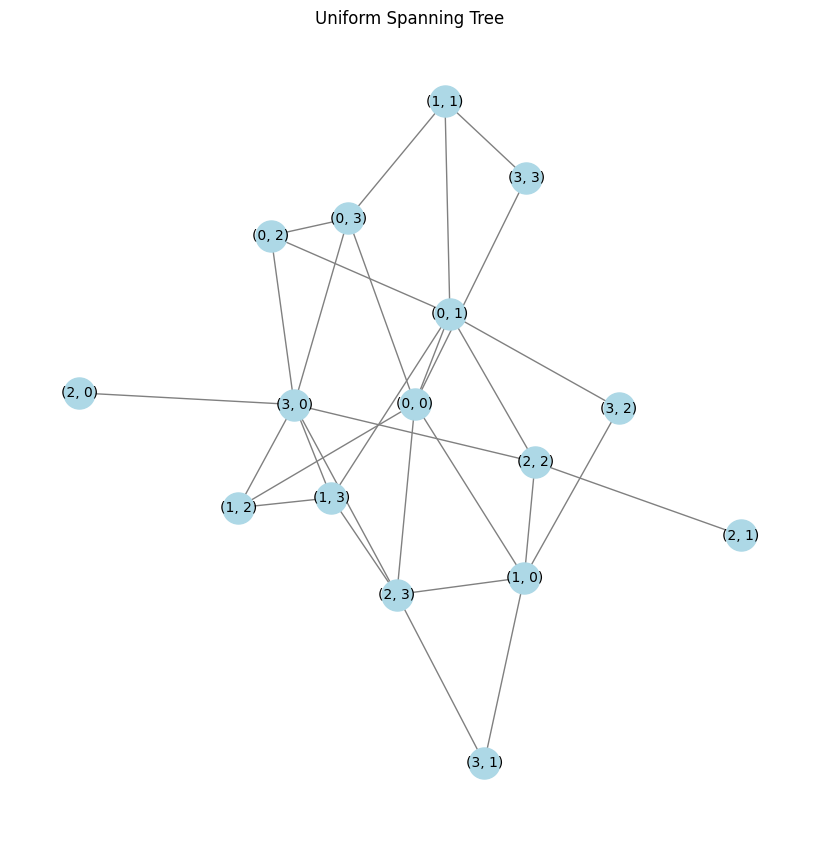

Generated graph 33.

torch.Size([1, 120])
torch.Size([120])


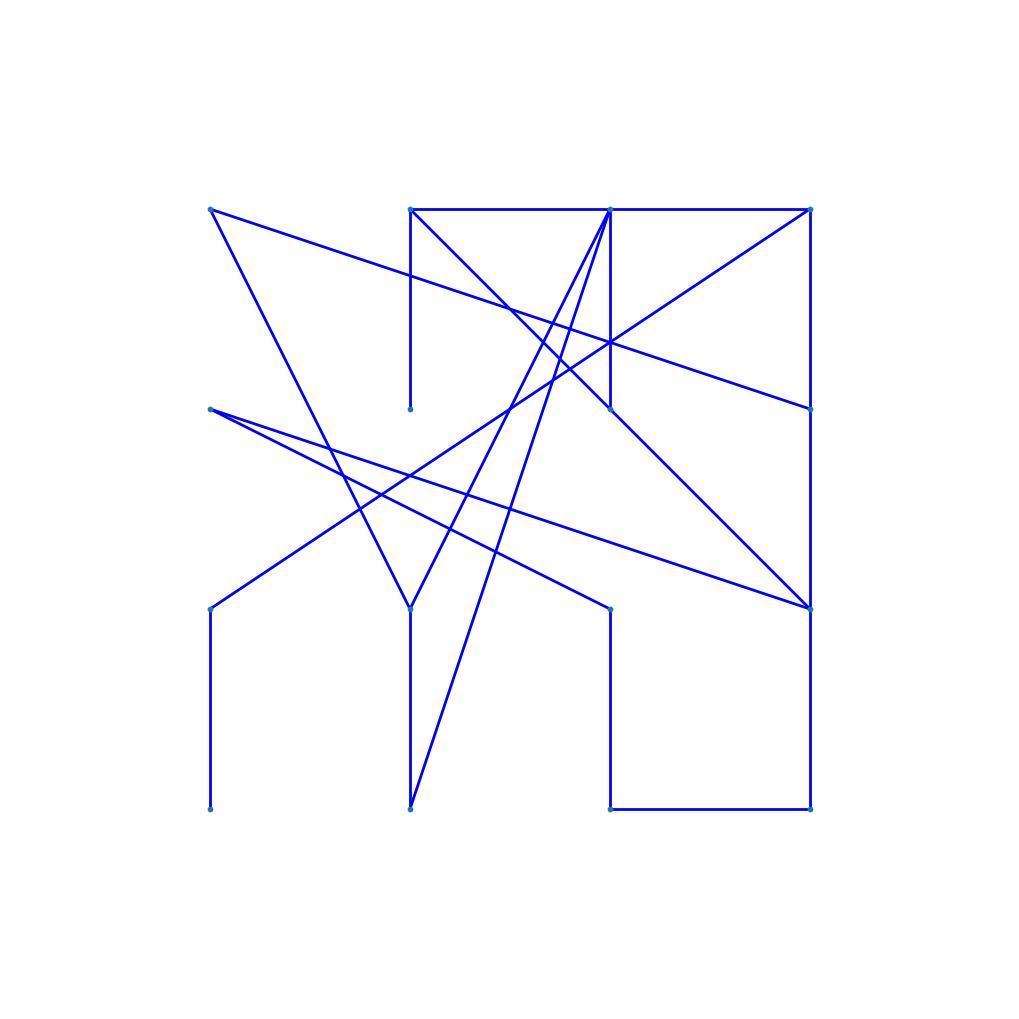

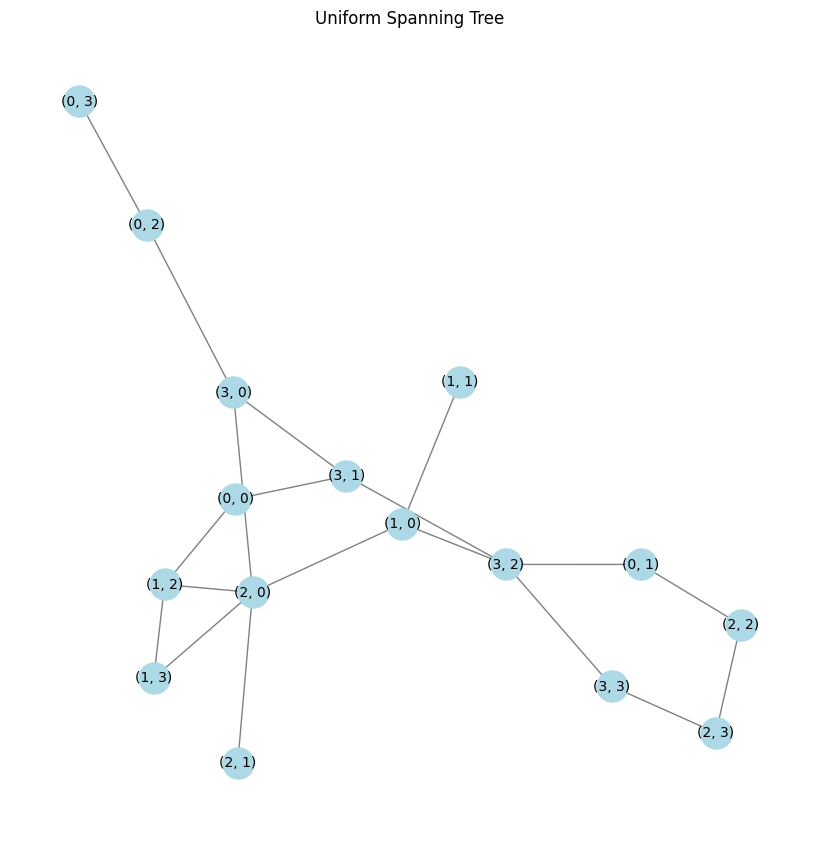

Generated graph 33.

torch.Size([1, 120])
torch.Size([120])


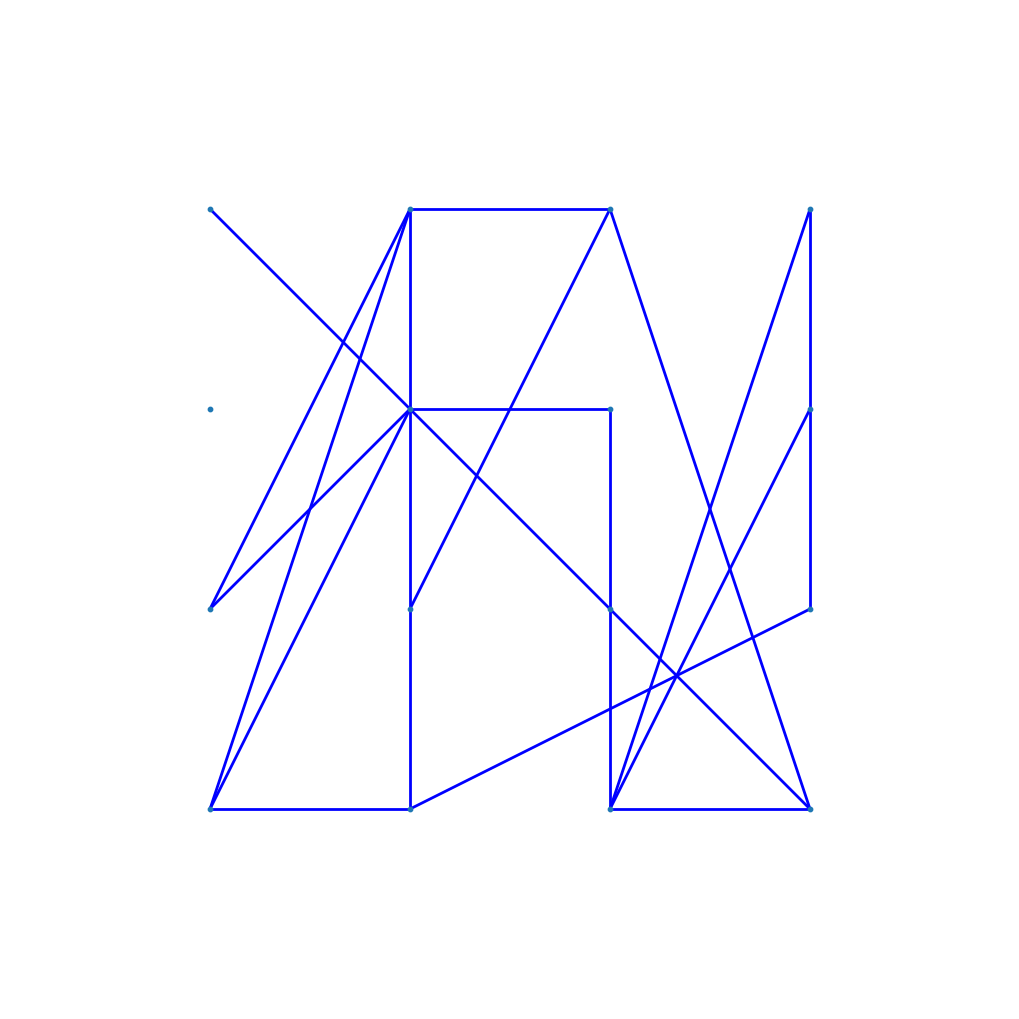

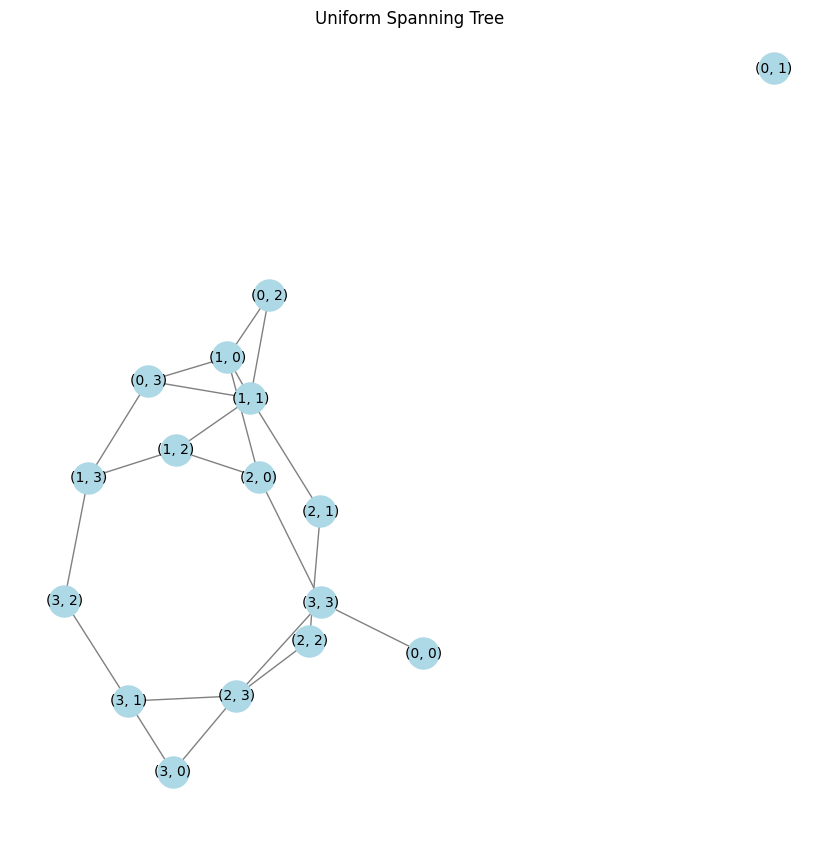

Generated graph 33.

torch.Size([1, 120])
torch.Size([120])


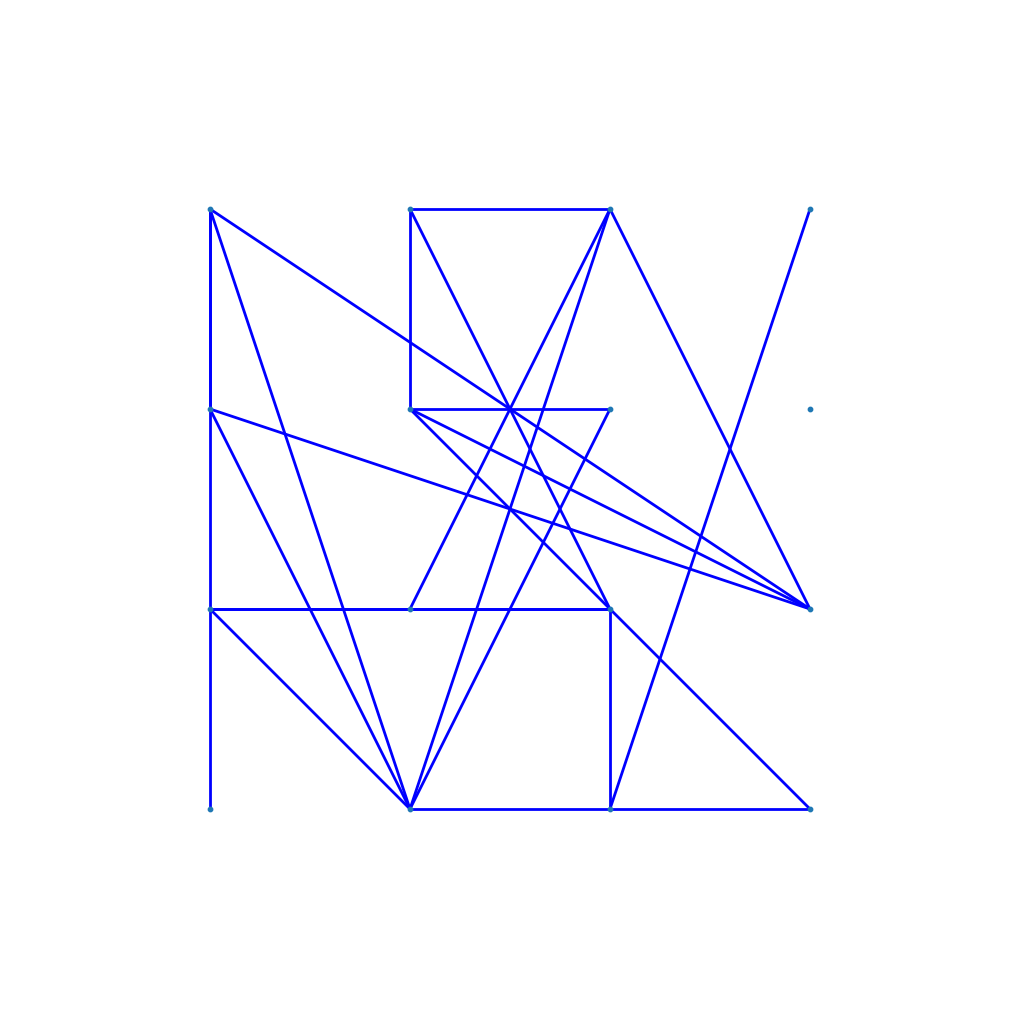

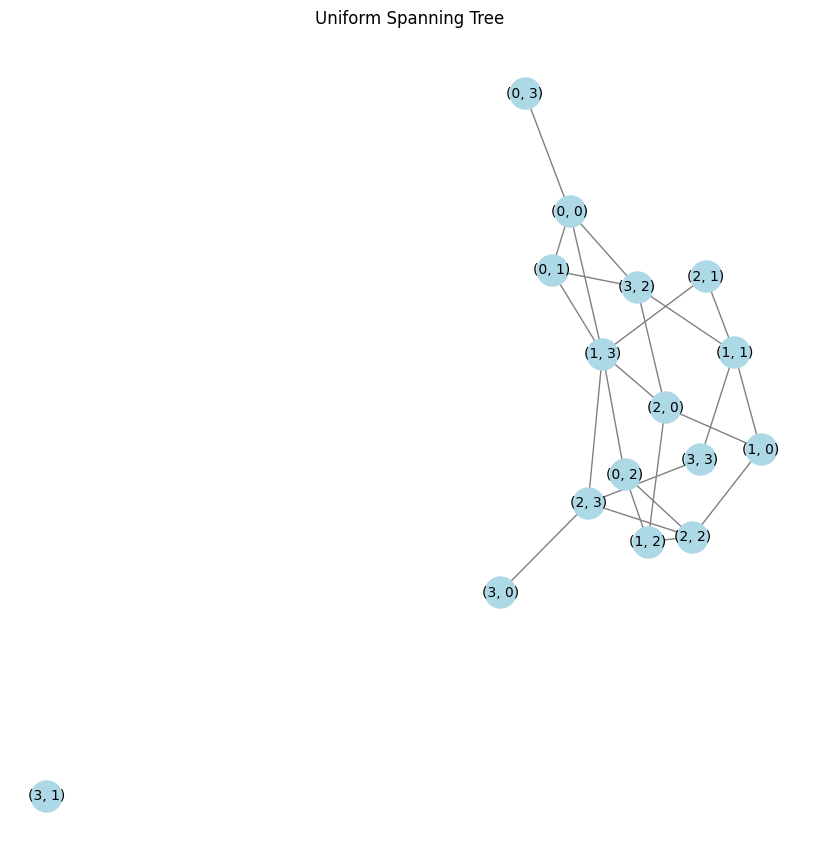

Generated graph 33.

torch.Size([1, 120])
torch.Size([120])


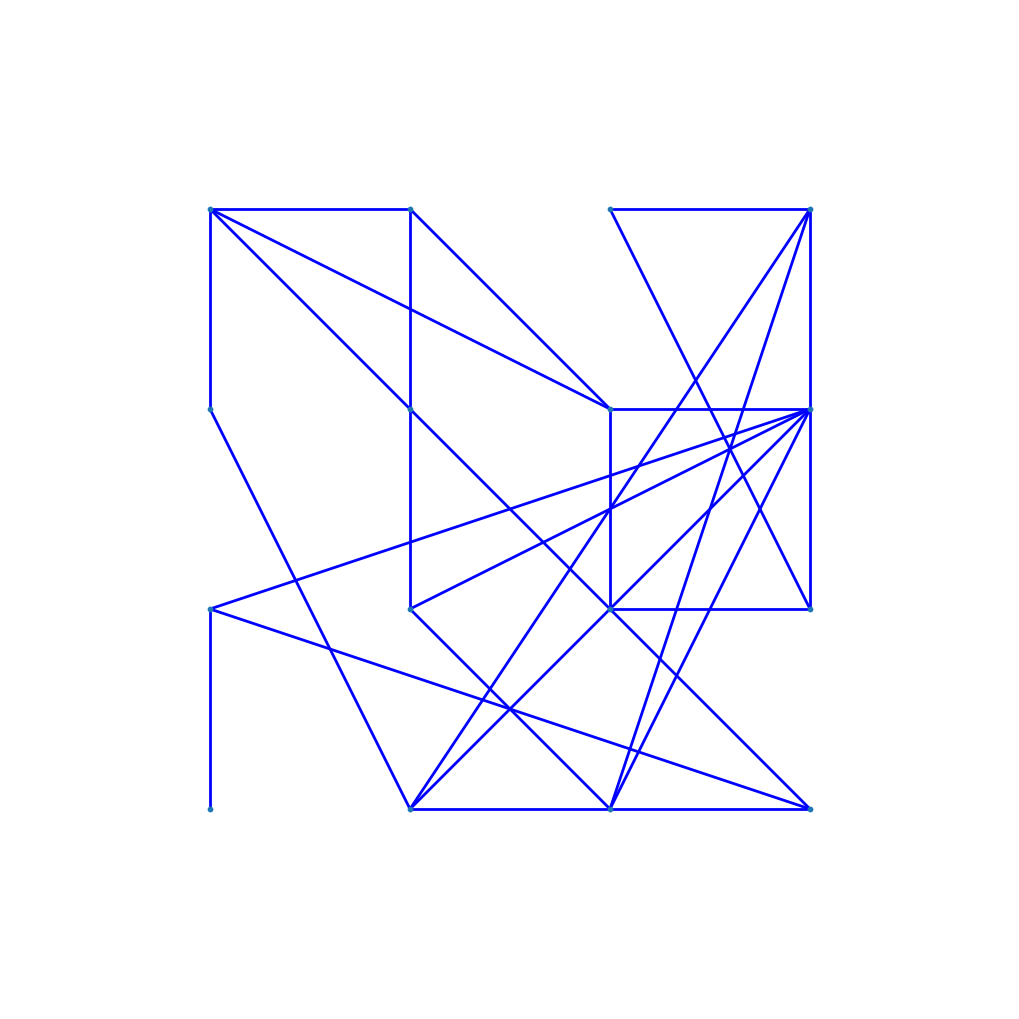

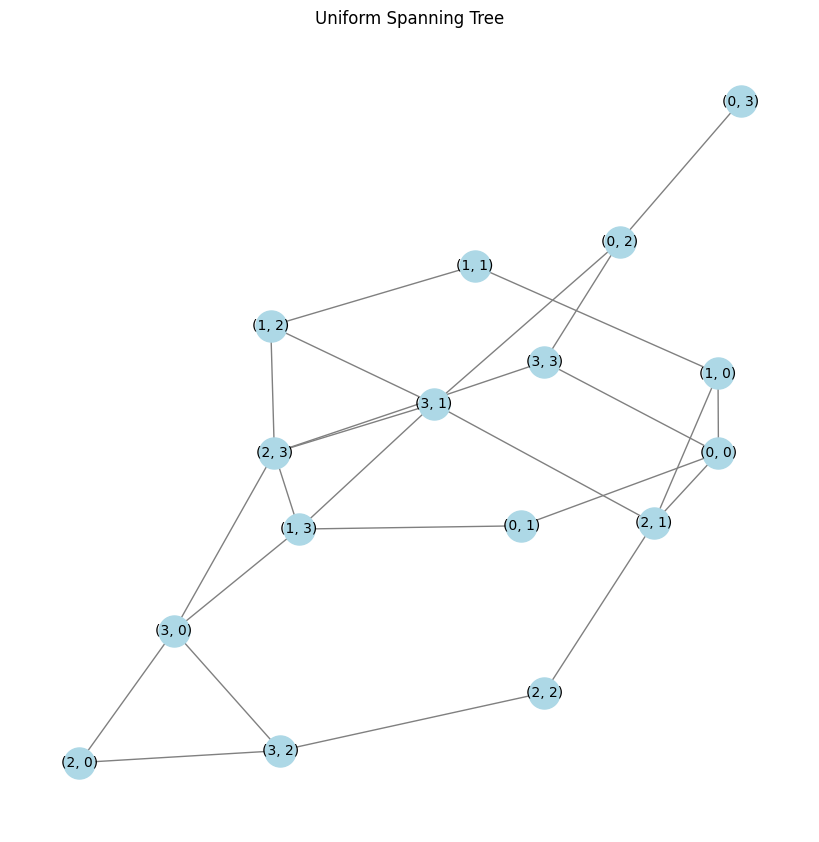

Generated graph 33.

torch.Size([1, 120])
torch.Size([120])


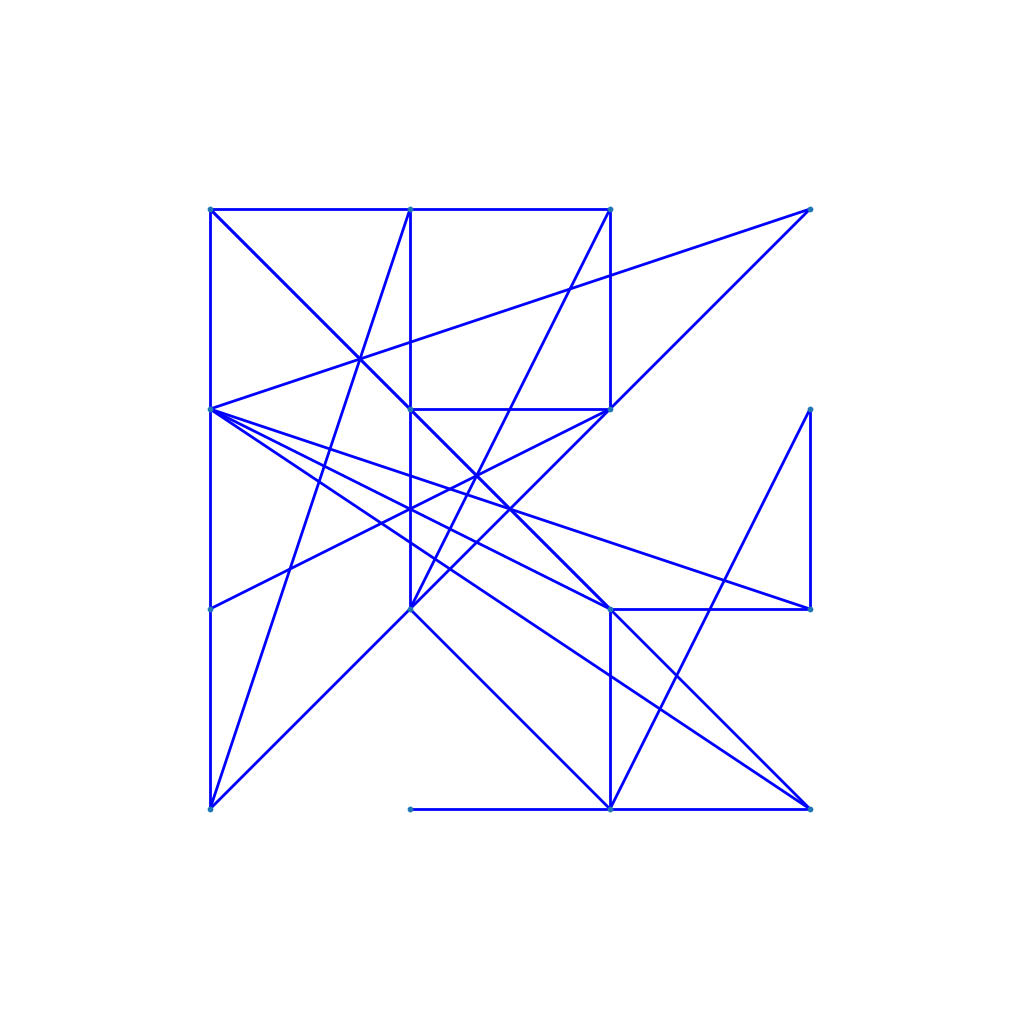

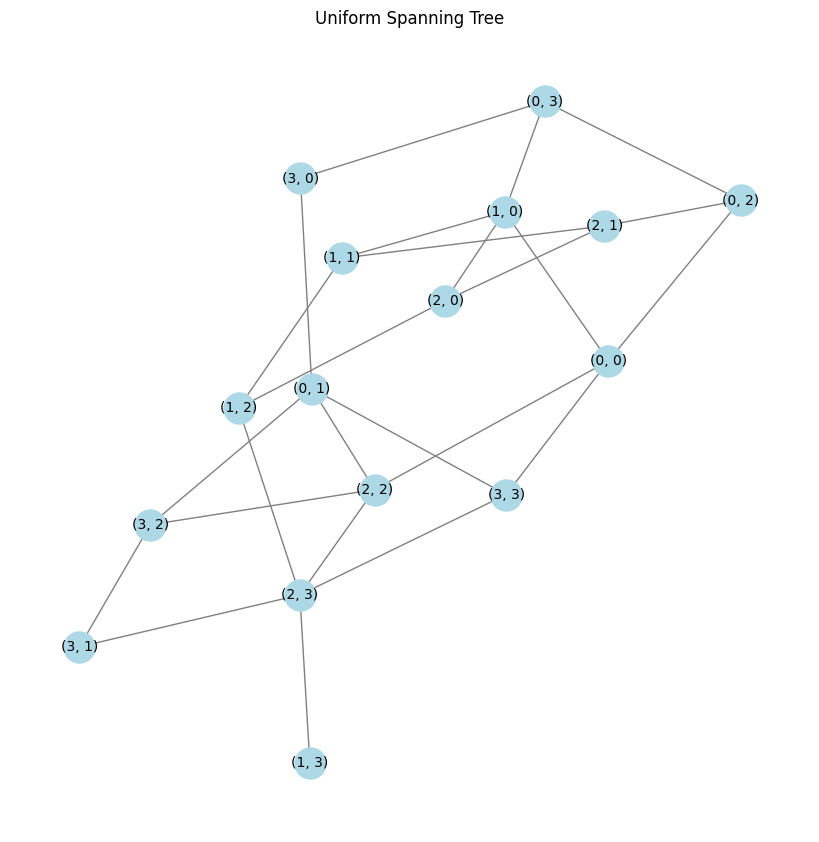

Generated graph 33.

torch.Size([1, 120])
torch.Size([120])


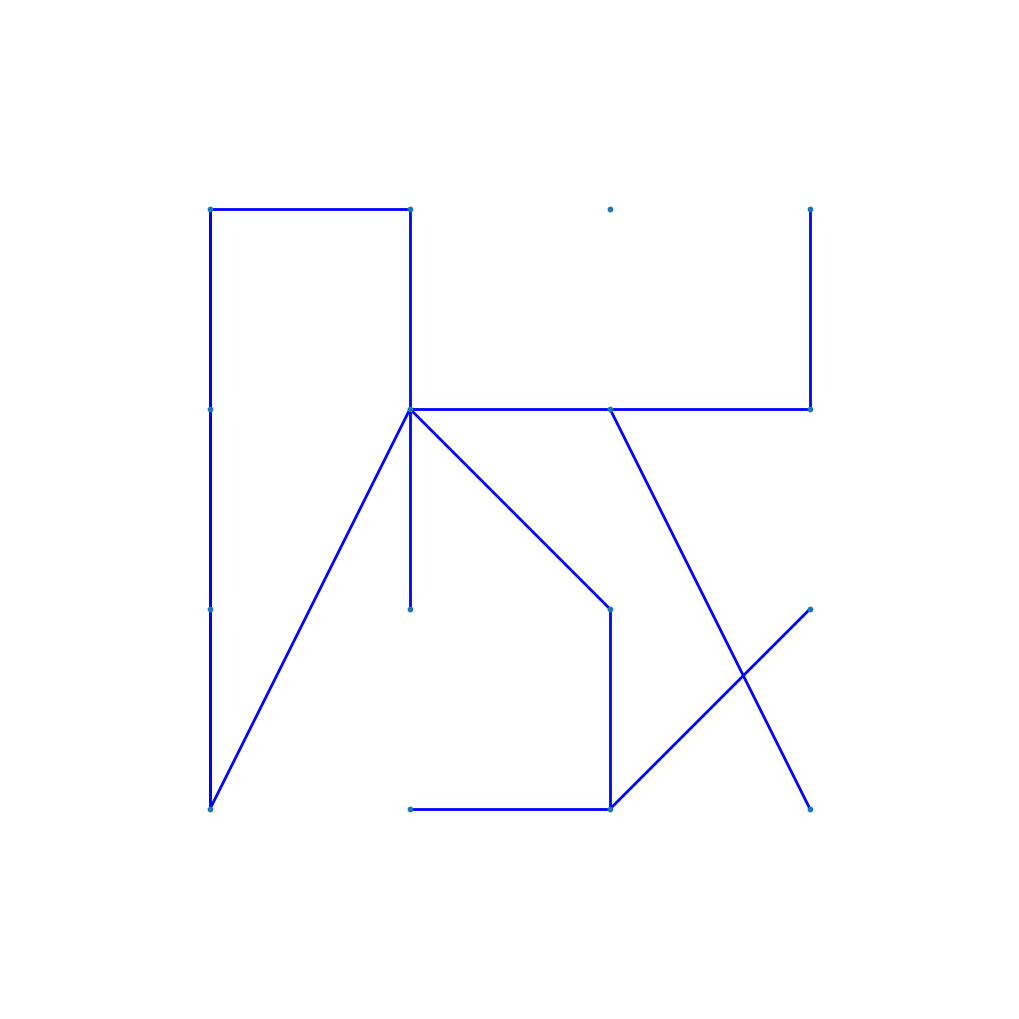

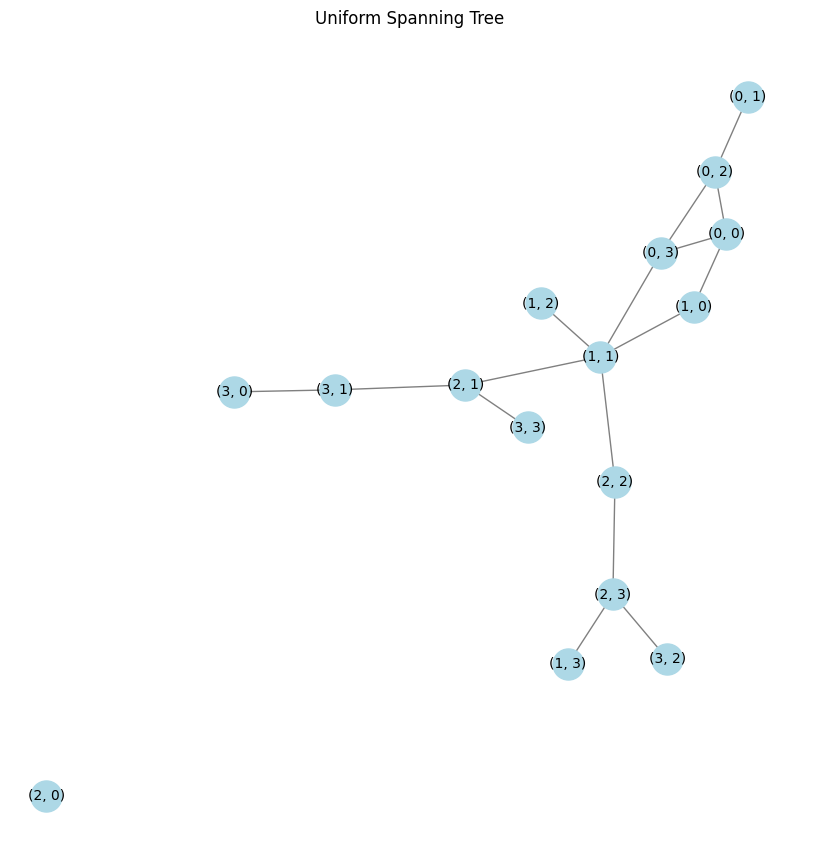

Generated graph 33.

torch.Size([1, 120])
torch.Size([120])


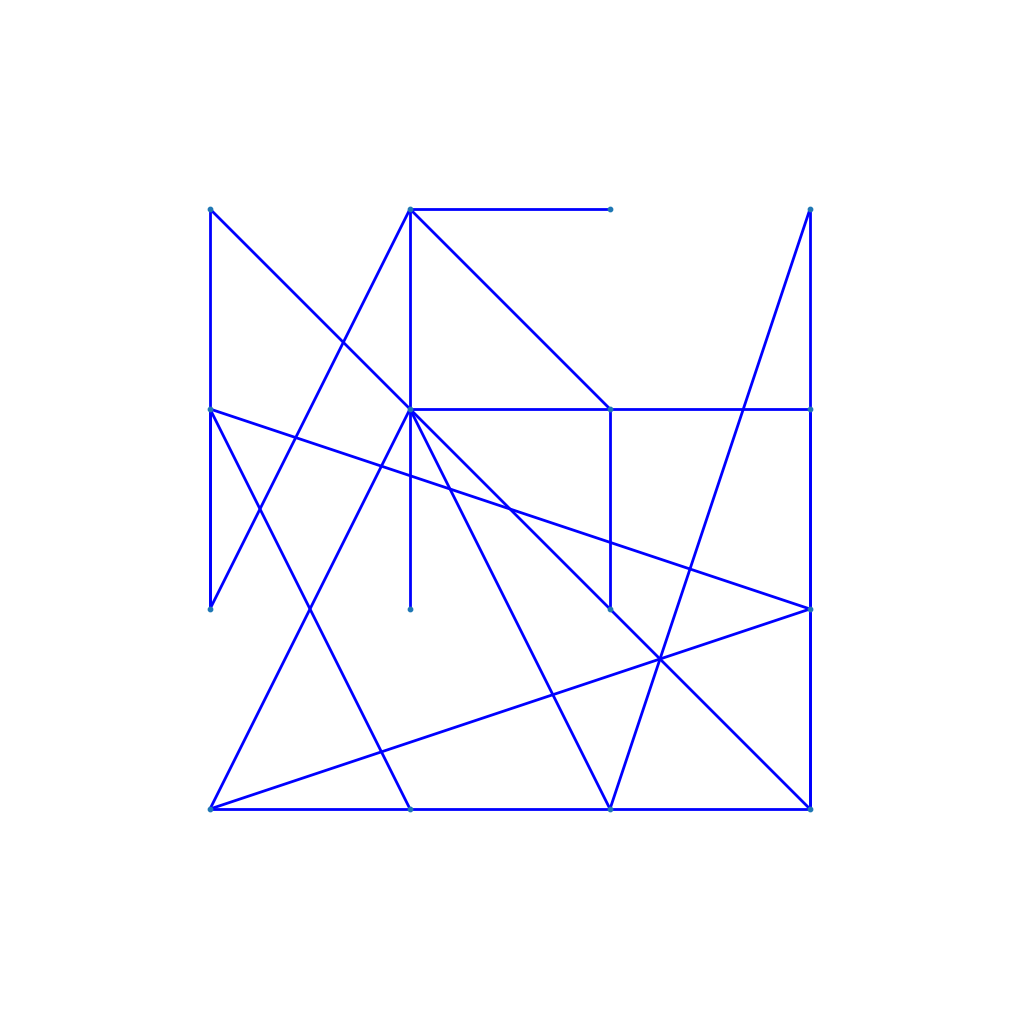

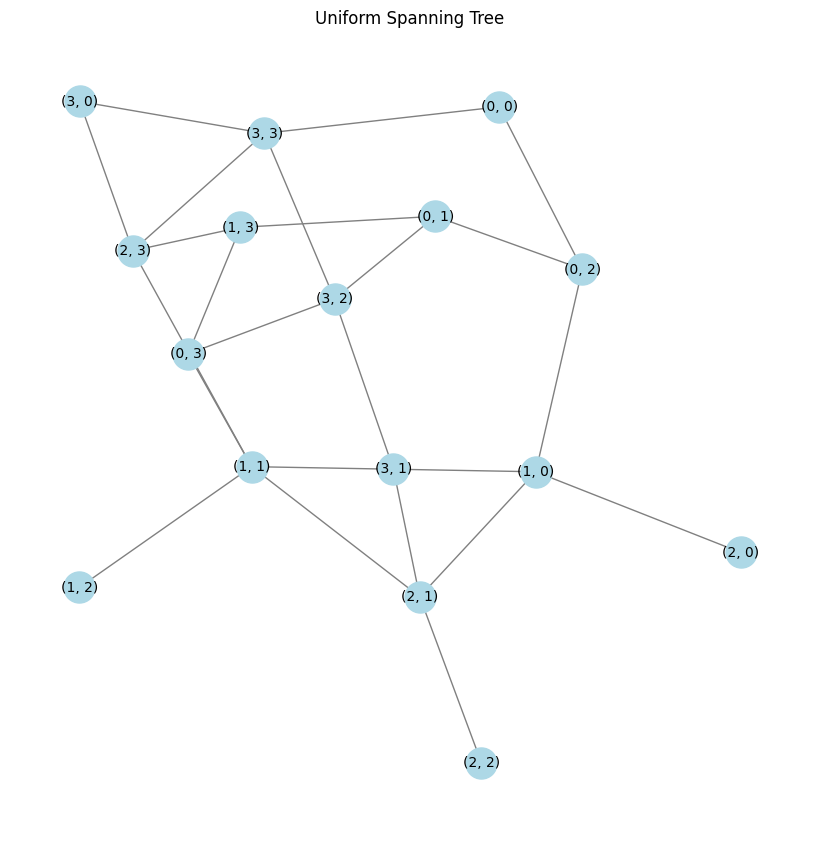

Generated graph 33.



In [6]:
import networkx as nx
import numpy as np
import math
import logging
import time
import os
import sys
import numpy as np
import torch
from matplotlib import pyplot as plt
import wandb
from dataset.extract_graph import get_dataloader
from dataset.extract_graph import vector_to_graph, vector_to_upper_triangular, upper_triangular_to_vector, graph_from_adjacency_matrix, visualize_graph, visualize_graph_from_vector, visualize_batch_from_dataloader
from model.model2 import Powerful
from model.unet import Unet
from utils.graphs import discretenoise, loss_func_bce, upper_flatten_to_adj_matrix, adj_matrix_to_upper_flatten

import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim

filename = 'dataset/usts_4.pkl'
width, height = 4, 4  
batch_size = 1  
dataloader = get_dataloader(filename, width, height, batch_size)
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
def visualize_graph2(G, title="Uniform Spanning Tree"):
    plt.figure(figsize=(8, 8))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)
    plt.title(title)
    plt.show()
def sample_ppgn_simple(noise_num):
    

    batch = next(iter(dataloader))
    train_graph_list = batch
    print(f"Loaded {len(train_graph_list)} train graphs.")
    
    model = Unet(dim=64).to(device)
    model.load_state_dict(torch.load('trained_model_unet_3.pth'))
    model.eval()
    
    max_node_number = 16
    test_batch_size = 16
    test_batch_size = 1
    
    def gen_init_data(batch_size):
        base_adjs = upper_flatten_to_adj_matrix(batch, width * height)
        base_adjs= base_adjs.to(device)
        bernoulli_adj = torch.zeros(batch_size, max_node_number, max_node_number).to(device)
        for k, matrix in enumerate(base_adjs):
            for i, row in enumerate(matrix):
                for j, col in enumerate(row):
                    bernoulli_adj[k, i, j] = 1/2
                        
        noise_upper = torch.bernoulli(bernoulli_adj).triu(diagonal=1)
        noise_lower = noise_upper.transpose(-1, -2)
        initialmatrix = noise_lower + noise_upper
        return initialmatrix


    sigma_tens = torch.linspace(0, 1/2, noise_num)
    sigma_list = sigma_tens.tolist()
    sigma_list.sort()
    sigma_list = torch.tensor(sigma_list, dtype=torch.float32).to(device)

    def add_bernoulli( init_adjs, noiselevel):
        init_adjs = adj_matrix_to_upper_flatten(init_adjs)
        init_adjs, noise = discretenoise(init_adjs, noiselevel, device)

        init_adjs = upper_flatten_to_adj_matrix(init_adjs, max_node_number)
        return init_adjs

    def take_step(noise_func, init_adjs, noiselevel):
        init_adjs = add_bernoulli( init_adjs, noiselevel)
        mask = torch.ones_like(init_adjs)
        init_adjs = init_adjs.unsqueeze(1)
        noiselevel = noiselevel.unsqueeze(0)
        noise_unnormal = noise_func(adj_matrix=init_adjs.to(device), noise=noiselevel)
        noise_unnormal = noise_unnormal.squeeze(1)
        init_adjs = init_adjs.squeeze(1)
        noise_rel = torch.sigmoid(noise_unnormal)
        noise_rel = (noise_rel + noise_rel.transpose(-1, -2)) / 2
        noise = torch.bernoulli(noise_rel) * mask
        
        inter_adjs = torch.where(noise > 1/2, init_adjs - 1, init_adjs)
        new_adjs = torch.where(inter_adjs < -1/2, inter_adjs + 2, inter_adjs)
        return init_adjs, new_adjs

    def run_sample(nb_eval=10):
        print("Starting run_sample...\n")
        gen_graph_list = []
        with torch.no_grad():
            nb=0
            while nb<nb_eval:
                init_adjs = gen_init_data(batch_size=test_batch_size)
                nb+=1
                count = 0
                while count < noise_num :
                    noiselevel = sigma_list[len(sigma_list) - count - 1]

                    noiselevel = torch.tensor(noiselevel, dtype=torch.float32).to(device)
                    noisy_adjs, init_adjs = take_step(lambda adj_matrix, noise: model(adj_matrix, noise), init_adjs=init_adjs, noiselevel=noiselevel)
                    count+=1
                init_adjs = init_adjs.cpu()
                vector = adj_matrix_to_upper_flatten(init_adjs)
                g = vector_to_graph(vector[0], width, height)
                visualize_graph(vector, width, height)
                
                visualize_graph2(g)
                print(f"Generated graph {count + 1}.\n")
    result_dict = run_sample()

    return result_dict


sample_ppgn_simple(32)
